# Base de données de l'étude 

## Phase 1: Récupération et Visualisation des Régions de France

Ce code télécharge les données géographiques des régions françaises, calcule leurs centroïdes et affiche une carte. Les centroïdes sont extraits pour chaque région et stockés sous forme de triplets (region, longitude, latitude) pour une utilisation ultérieure.

In [1]:
#Installation des bibliothèques nécessaires pour la récupération et la représentation des données géographiques
!pip install contextily && geopandas &&  topojson && py7zr && openpyxl && tqdm && s3fs && pandas && fiona && shapely && pyproj && rtree
!pip install PyYAML xlrd && git+https://github.com/inseefrlab/cartiflette && git+https://github.com/inseeFrLab/cartiflette.git && openmeteo-requests
!pip install requests-cache retry-requests 
!pip install geopandas 
!pip install cartiflette

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
# Récupératoin des données 

from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)


In [4]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...  
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....  
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...  
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...  
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...

In [109]:
print(france.crs)

EPSG:4326


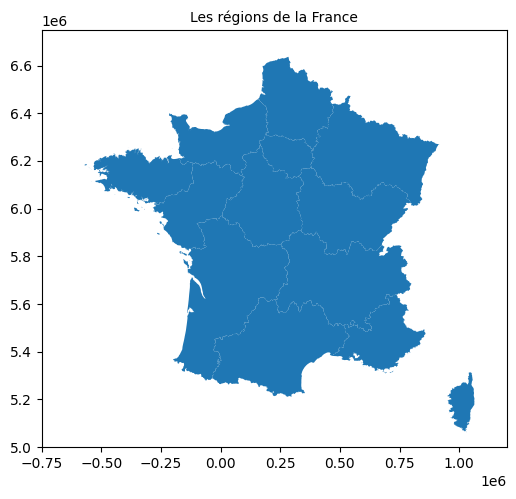

In [5]:
#REPRESENTATION 

if france.crs.to_string() != "EPSG:3857":
    france = france.to_crs(epsg=3857)
#Les  limites de la carte
xmin, xmax = -0.75e6, 1.2e6  # Convertir les limites en mètres (EPSG:3857)
ymin, ymax = 5e6, 6.75e6

#Ploting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Les régions de la France", fontsize=10)
plt.show()


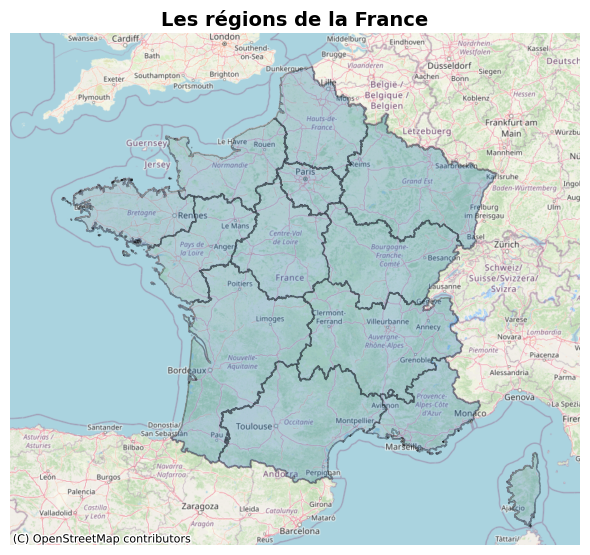

In [6]:
# Ajout d'un fond de carte pour un meilleur contexte géographique
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
#
plt.title("Les régions de la France", fontsize=14, fontweight='bold')
ax.axis('off') 

plt.tight_layout() 
plt.show()


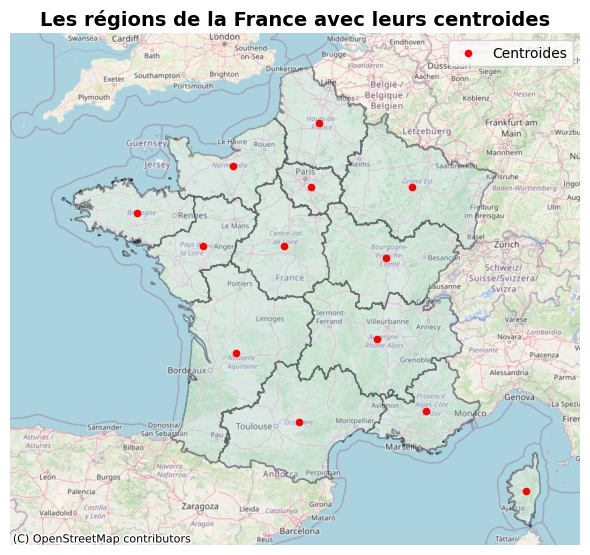

In [7]:
#Représentation des centroides 
france['centroid'] = france.geometry.centroid
france['longitude'] = france.centroid.x
france['latitude'] = france.centroid.y
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3, color='lightblue')
ax.scatter(france['longitude'], france['latitude'], color='red', s=20, label='Centroides')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
plt.title("Les régions de la France avec leurs centroides", fontsize=14, fontweight='bold')
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

In [8]:
# Calcul des longitudes et latitudes 
france = france.to_crs(epsg=4326)
france['longitude'] = france.geometry.centroid.x
france['latitude'] = france.geometry.centroid.y
print(france[['LIBELLE_REGION', 'longitude', 'latitude']])


                LIBELLE_REGION  longitude   latitude
0                   Guadeloupe -61.539833  16.197646
1                       Guyane -53.239940   3.915167
2                   Martinique -61.019379  14.654871
3                      Mayotte  45.147435 -12.820617
4         Auvergne-Rhône-Alpes   4.536119  45.514642
5                    Occitanie   2.143923  43.702500
6                     Bretagne  -2.841463  48.177549
7           Nouvelle-Aquitaine   0.212719  45.206040
8                    Normandie   0.110932  49.120067
9   Provence-Alpes-Côte d'Azur   6.061005  43.958789
10            Pays de la Loire  -0.816786  47.478104
11                   Grand Est   5.613112  48.688977
12     Bourgogne-Franche-Comté   4.806857  47.234282
13               Île-de-France   2.503401  48.709316
14         Centre-Val de Loire   1.684391  47.484775
15             Hauts-de-France   2.771303  49.969594
16                       Corse   9.106152  42.151511
17                  La Réunion  55.532509 -21.

C:\Users\steph\AppData\Local\Temp\ipykernel_2268\2487130668.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['longitude'] = france.geometry.centroid.x
C:\Users\steph\AppData\Local\Temp\ipykernel_2268\2487130668.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['latitude'] = france.geometry.centroid.y


In [9]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  \
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...   
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....   
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...   
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...   
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...   

                           centroid  longitude   latitude  
0  POINT (-6850582.542 1827642.261) -61.539833  16.197646  
1    POINT (-5926644.81 436331.726) -53.239940   3.915167  
2  POINT (-6792650.367 1649468.223) -61.019379  14.654871  
3  POINT (5025789.843 -1439250.269)  45.147435 -12.820617  
4     POINT (504837.95 5704315.458)   4.536119  45.514642

In [10]:
# Création de la liste de triplets (région, longitude, latitude)
region_centroides = []
for index, row in france.iterrows():
    region = row['LIBELLE_REGION']  # Nom de la région
    longitude = row['longitude']  # Longitude du centroïde
    latitude = row['latitude']    # Latitude du centroïde
    region_centroides.append((region, longitude, latitude)) # Ajout du triplet à la liste
region_centroides

[('Guadeloupe', -61.53983304107784, 16.197645826552904),
 ('Guyane', -53.23993971851178, 3.915166862499844),
 ('Martinique', -61.019378740773654, 14.654870858984358),
 ('Mayotte', 45.14743542382146, -12.820616875536656),
 ('Auvergne-Rhône-Alpes', 4.536118586333609, 45.51464202656834),
 ('Occitanie', 2.143922833937654, 43.70250024549978),
 ('Bretagne', -2.841462676465886, 48.17754922086023),
 ('Nouvelle-Aquitaine', 0.21271860548694332, 45.2060395396088),
 ('Normandie', 0.11093239896467046, 49.12006667987373),
 ("Provence-Alpes-Côte d'Azur", 6.061004522552231, 43.95878857291765),
 ('Pays de la Loire', -0.81678598261894, 47.47810354487287),
 ('Grand Est', 5.613112231600144, 48.68897740160863),
 ('Bourgogne-Franche-Comté', 4.806856915301157, 47.2342819451994),
 ('Île-de-France', 2.503401392552759, 48.70931550109074),
 ('Centre-Val de Loire', 1.684391322381998, 47.48477508284454),
 ('Hauts-de-France', 2.7713028658475474, 49.969593961262426),
 ('Corse', 9.106151755156151, 42.15151137562012),

# Phase 2: Collecte des Données de Qualité de l'Air

Ce script collecte des **données horaires de qualité de l'air** via l'API Open-Meteo pour différentes régions. 
Il récupère les polluants clés (**PM10**, **PM2.5**, **CO**, **NO₂**, **SO₂**, **Ozone**)  et quelques données sur le climat
et les organise dans un tableau structuré.

---

## **Fonctionnalités**
- Utilisation d'un **cache** et de **répétitions automatiques** pour des requêtes fiables.
- Organisation des données dans des **DataFrames pandas**.
- Ajout d'une colonne pour **extraire les dates** sans les heures.
- Fusion des données pour une **analyse centralisée**.





In [11]:
from scripts import api
from scripts.api import recup_data
var_air=["pm10", "pm2_5", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"]
combined_dataframe_air = api.recup_data("2023-01-01","2024-11-30","https://air-quality-api.open-meteo.com/v1/air-quality",var_air,region_centroides)

In [12]:
combined_dataframe_air

date         day      region  longitude  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
...                          ...         ...         ...        ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  55.532509   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion  55.532509   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion  55.532509   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion  55.532509   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion  55.532509   

         latitude       pm10  pm2_5  carbon_dioxide  nitrogen_dioxide  \
0       16.197646  20.500000   11.3             NaN              3.70   
1       16.197646  21.700001   11.9             NaN              3.45   
2       16.197646  21.799999   12.0             NaN              3.15   
3       16.197646  20.700001   11.4             NaN              2.60   
4       16.197646  19.400000   10.7             NaN              2.10   
...           ...        ...    ...             ...               ...   
302395 -21.133203  10.000000    7.1           459.0              3.60   
302396 -21.133203   9.800000    7.1           455.0              4.20   
302397 -21.133203   9.700000    7.0           453.0              4.50   
302398 -21.133203   9.500000    6.9           455.0              4.40   
302399 -21.133203   9.500000    7.0           459.0              4.10   

        sulphur_dioxide  ozone  
0                  0.30   62.0  
1                  0.30   62.0  
2                  0.25   63.0  
3                  0.25   64.0  
4                  0.25   64.0  
...                 ...    ...  
302395             2.50   56.0  
302396             2.30   52.0  
302397             2.20   49.0  
302398             2.10   47.0  
302399             2.10   46.0  

[302400 rows x 11 columns]

In [13]:
var_climat=["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]
combined_dataframe_climat = api.recup_data("2023-01-01","2024-11-30","https://archive-api.open-meteo.com/v1/archive",var_climat,region_centroides)
combined_dataframe_climat = combined_dataframe_climat.drop(columns=["region","date","day"])

In [14]:
df_hourly=pd.concat([combined_dataframe_air,combined_dataframe_climat],axis=1)
df_hourly

date         day      region  longitude  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
...                          ...         ...         ...        ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  55.532509   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion  55.532509   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion  55.532509   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion  55.532509   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion  55.532509   

         latitude       pm10  pm2_5  carbon_dioxide  nitrogen_dioxide  \
0       16.197646  20.500000   11.3             NaN              3.70   
1       16.197646  21.700001   11.9             NaN              3.45   
2       16.197646  21.799999   12.0             NaN              3.15   
3       16.197646  20.700001   11.4             NaN              2.60   
4       16.197646  19.400000   10.7             NaN              2.10   
...           ...        ...    ...             ...               ...   
302395 -21.133203  10.000000    7.1           459.0              3.60   
302396 -21.133203   9.800000    7.1           455.0              4.20   
302397 -21.133203   9.700000    7.0           453.0              4.50   
302398 -21.133203   9.500000    6.9           455.0              4.40   
302399 -21.133203   9.500000    7.0           459.0              4.10   

        sulphur_dioxide  ozone  longitude   latitude  temperature_2m  \
0                  0.30   62.0 -61.539833  16.197646       23.770000   
1                  0.30   62.0 -61.539833  16.197646       23.719999   
2                  0.25   63.0 -61.539833  16.197646       23.520000   
3                  0.25   64.0 -61.539833  16.197646       23.270000   
4                  0.25   64.0 -61.539833  16.197646       22.469999   
...                 ...    ...        ...        ...             ...   
302395             2.50   56.0  55.532509 -21.133203       10.291500   
302396             2.30   52.0  55.532509 -21.133203        9.891500   
302397             2.20   49.0  55.532509 -21.133203        9.391500   
302398             2.10   47.0  55.532509 -21.133203        8.891500   
302399             2.10   46.0  55.532509 -21.133203        9.091500   

        relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  
0                  84.863304            0.0       1017.400024        9.422101  
1                  85.643173            0.0       1017.599976        9.885262  
2                  86.947586            0.0       1017.700012        9.720000  
3                  88.269188            0.0       1017.400024        7.559999  
4                  94.082932            0.2       1017.299988        8.825508  
...                      ...            ...               ...             ...  
302395             93.833534            0.0        824.523071        3.617955  
302396             93.814590            0.0        823.957458        3.847960  
302397             97.342743            0.0        823.007019        3.065289  
302398             99.663048            0.0        822.137085        2.979530  
302399             99.663582            0.0        821.774109        3.710795  

[302400 rows x 18 columns]

In [ ]:
#df_hourly=df_hourly.drop_duplicates()


In [15]:
# Agrégation par 'day' et 'region' en prenant la moyenne
df = df_hourly.groupby(['day', 'region']).mean().reset_index()

# 📊 ANALYSE EXPLORATOIRE

Cette analyse explore les données en **panel** afin de comprendre les tendances, les relations entre variables et les spécificités régionales et temporelles. 

Elle sert également de base à la préparation des données pour la modélisation prédictive.

---

## **1. Exploration de base des données**

### 🔍 **Statistiques descriptives globales**

### 🌍 Filtrage des Données : Régions Européennes

Dans cette étape, nous avons filtré les données pour ne conserver que les régions françaises situées en Europe. Ce filtrage est essentiel pour se concentrer sur les régions métropolitaines et éviter de mélanger les données avec celles des régions d'outre-mer.

---

#### **1. Liste des Régions Européennes**
Voici les 13 régions métropolitaines françaises incluses dans l'analyse :

1. Auvergne-Rhône-Alpes  
2. Bourgogne-Franche-Comté  
3. Bretagne  
4. Centre-Val de Loire  
5. Corse  
6. Grand Est  
7. Hauts-de-France  
8. Île-de-France  
9. Normandie  
10. Nouvelle-Aquitaine  
11. Occitanie  
12. Pays de la Loire  
13. Provence-Alpes-Côte d'Azur  

In [16]:

regions_europe = ["Auvergne-Rhône-Alpes","Bourgogne-Franche-Comté","Bretagne","Centre-Val de Loire","Corse","Grand Est","Hauts-de-France","Île-de-France","Normandie","Nouvelle-Aquitaine","Occitanie","Pays de la Loire",
    "Provence-Alpes-Côte d'Azur"
]

# Filtrage des régions européennes
df1 = df[df['region'].isin(regions_europe)]



In [17]:
df1.head()

day                   region                      date  longitude  \
0  2023-01-01     Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00   4.536119   
1  2023-01-01  Bourgogne-Franche-Comté 2023-01-01 11:30:00+00:00   4.806857   
2  2023-01-01                 Bretagne 2023-01-01 11:30:00+00:00  -2.841463   
3  2023-01-01      Centre-Val de Loire 2023-01-01 11:30:00+00:00   1.684391   
4  2023-01-01                    Corse 2023-01-01 11:30:00+00:00   9.106152   

    latitude       pm10     pm2_5  carbon_dioxide  nitrogen_dioxide  \
0  45.514642  14.954166  7.858334             NaN          3.475000   
1  47.234282  13.300000  7.737500             NaN          3.795833   
2  48.177549   9.845834  5.720833             NaN          3.395833   
3  47.484775  13.750000  7.679167             NaN          2.837500   
4  42.151511   8.979167  5.345833             NaN          2.208333   

   sulphur_dioxide      ozone  longitude   latitude  temperature_2m  \
0         0.837500  62.250000   4.536119  45.514642       11.954083   
1         0.741667  59.541668   4.806857  47.234282       10.743833   
2         0.270833  64.916664  -2.841463  48.177549       10.547750   
3         0.770833  52.958332   1.684391  47.484775       14.431666   
4         0.341667  52.833332   9.106152  42.151511        6.793917   

   relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  
0             71.024551       0.000000        964.791809       23.574928  
1             77.391754       0.000000        963.939941       20.494823  
2             89.859863       0.358333        998.909729       18.512320  
3             66.970406       0.000000       1004.533508       18.958830  
4             73.633392       0.000000        841.699280        4.792229

In [18]:
df1.shape

(9100, 18)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9100 entries, 0 to 12599
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   day                   9100 non-null   object             
 1   region                9100 non-null   object             
 2   date                  9100 non-null   datetime64[ns, UTC]
 3   longitude             9100 non-null   float64            
 4   latitude              9100 non-null   float64            
 5   pm10                  9100 non-null   float32            
 6   pm2_5                 9100 non-null   float32            
 7   carbon_dioxide        468 non-null    float32            
 8   nitrogen_dioxide      9100 non-null   float32            
 9   sulphur_dioxide       9100 non-null   float32            
 10  ozone                 9100 non-null   float32            
 11  longitude             9100 non-null   float64            
 12  latitude  

####  🔍 Vérification de la structure des données panel

Nous allons vérifier si chaque combinaison region et day est unique

In [20]:
print(df1.groupby(['region', 'day']).size())
duplicates = df1.groupby(['region', 'day']).size()
print((duplicates > 1).sum())  # Vérifie combien de combinaisons ont plus d'une observation

region                day       
Auvergne-Rhône-Alpes  2023-01-01    1
                      2023-01-02    1
                      2023-01-03    1
                      2023-01-04    1
                      2023-01-05    1
                                   ..
Île-de-France         2024-11-26    1
                      2024-11-27    1
                      2024-11-28    1
                      2024-11-29    1
                      2024-11-30    1
Length: 9100, dtype: int64
0


### 🔍 Valeurs manquantes

In [21]:
df1.isnull().sum() / len(df1) * 100

day                      0.000000
region                   0.000000
date                     0.000000
longitude                0.000000
latitude                 0.000000
pm10                     0.000000
pm2_5                    0.000000
carbon_dioxide          94.857143
nitrogen_dioxide         0.000000
sulphur_dioxide          0.000000
ozone                    0.000000
longitude                0.000000
latitude                 0.000000
temperature_2m           0.000000
relative_humidity_2m     0.000000
precipitation            0.000000
surface_pressure         0.000000
wind_speed_10m           0.000000
dtype: float64

### **2. Observations Clés**
1. **Absence de valeurs manquantes** :  
   - La majorité des variables ne contiennent **aucune valeur manquante**, ce qui garantit une bonne qualité des données pour ces dimensions.

2. **Problème majeur avec `carbon_dioxide`** :  
   - Cette variable présente **94.86% de valeurs manquantes**, ce qui rend son utilisation directe problématique.
   - Nous allons donc supprimer cette colonne .

In [22]:
df1 = df1.drop(columns="carbon_dioxide")
df_hourly =df_hourly.drop(columns="carbon_dioxide")

## 🌍 Phase 3: Calcul de l'Indice ATMO

L'**indice ATMO** est utilisé en France pour évaluer la qualité de l'air en se basant sur cinq principaux polluants : **PM10**, **PM2.5**, **NO₂**, **O₃**, et **SO₂**. 

Il synthétise ces données en un indicateur unique, simple à interpréter.

---

### 🛠️ **Méthode de Calcul**

#### **1. Calcul des Sous-Indices**
Chaque polluant se voit attribuer un **sous-indice** en fonction de sa concentration moyenne journalière 

(ou glissante pour certains polluants). Les seuils sont définis comme suit :

| **Sous-indice** | **PM10 (µg/m³)** | **PM2.5 (µg/m³)** | **NO₂ (µg/m³)** | **O₃ (µg/m³)** | **SO₂ (µg/m³)** |
|-----------------|------------------|-------------------|-----------------|----------------|-----------------|
| 1 (Très bon)   | 0 - 6            | 0 - 5             | 0 - 29          | 0 - 29         | 0 - 39          |
| 2              | 7 - 13           | 6 - 10            | 30 - 54         | 30 - 54        | 40 - 79         |
| 3              | 14 - 20          | 11 - 15           | 55 - 84         | 55 - 79        | 80 - 119        |
| 4              | 21 - 27          | 16 - 20           | 85 - 109        | 80 - 104       | 120 - 159       |
| 5              | 28 - 34          | 21 - 25           | 110 - 134       | 105 - 129      | 160 - 199       |
| 6              | 35 - 41          | 26 - 30           | 135 - 164       | 130 - 149      | 200 - 249       |
| 7              | 42 - 49          | 31 - 40           | 165 - 199       | 150 - 179      | 250 - 299       |
| 8              | 50 - 64          | 41 - 50           | 200 - 274       | 180 - 209      | 300 - 399       |
| 9              | 65 - 79          | 51 - 75           | 275 - 399       | 210 - 239      | 400 - 499       |
| 10 (Très mauvais) | ≥ 80          | ≥ 76              | ≥ 400           | ≥ 240          | ≥ 500           |

#### **2. Détermination de l'Indice Final**
L'**indice ATMO** correspond au **sous-indice le plus élevé** parmi les cinq polluants mesurés sur une journée. 

Cela signifie que le polluant le plus préoccupant domine l'indicateur global.

---

### 📊 **Échelle de Qualité de l'Air**

| **Indice ATMO** | **Niveau de Qualité** | **Couleur Associée** |
|------------------|-----------------------|-----------------------|
| 1-2             | Très bon              | 🟢 Vert clair         |
| 3-4             | Bon                   | 🟢 Vert               |
| 5               | Moyen                 | 🟡 Jaune              |
| 6-7             | Médiocre              | 🟠 Orange             |
| 8-9             | Mauvais               | 🔴 Rouge              |
| 10              | Très mauvais          | 🟣 Violet             |

---

### 🔗 **Référence Officielle**
Pour plus de détails, consultez la page officielle de l'indice ATMO sur [Atmo France](https://www.atmo-france.org/article/lindice-atmo).

---


In [24]:
import pandas as pd
from scripts import indice
# Convert 'date' and 'day' columns to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1['day'] = pd.to_datetime(df1['day'])

# Sort data by 'region', 'day', and 'date'
df1 = df1.sort_values(by=['region', 'day', 'date'])

# Define functions to compute sub-indices for each pollutant
def get_subindex_pm10(value):
    if value <= 6: return 1
    elif value <= 13: return 2
    elif value <= 20: return 3
    elif value <= 27: return 4
    elif value <= 34: return 5
    elif value <= 41: return 6
    elif value <= 49: return 7
    elif value <= 64: return 8
    elif value <= 79: return 9
    else: return 10

def get_subindex_pm2_5(value):
    if value <= 5: return 1
    elif value <= 10: return 2
    elif value <= 15: return 3
    elif value <= 20: return 4
    elif value <= 25: return 5
    elif value <= 30: return 6
    elif value <= 40: return 7
    elif value <= 50: return 8
    elif value <= 75: return 9
    else: return 10

def get_subindex_no2(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 84: return 3
    elif value <= 109: return 4
    elif value <= 134: return 5
    elif value <= 164: return 6
    elif value <= 199: return 7
    elif value <= 274: return 8
    elif value <= 399: return 9
    else: return 10

def get_subindex_o3(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 79: return 3
    elif value <= 104: return 4
    elif value <= 129: return 5
    elif value <= 149: return 6
    elif value <= 179: return 7
    elif value <= 209: return 8
    elif value <= 239: return 9
    else: return 10

def get_subindex_so2(value):
    if value <= 39: return 1
    elif value <= 79: return 2
    elif value <= 119: return 3
    elif value <= 159: return 4
    elif value <= 199: return 5
    elif value <= 249: return 6
    elif value <= 299: return 7
    elif value <= 399: return 8
    elif value <= 499: return 9
    else: return 10

# Calcul des moyennes journalières pour toutes les variables
daily_data = df_hourly.groupby(['day', 'region']).agg({
    'pm10': 'mean',
    'pm2_5': 'mean',
    'nitrogen_dioxide': 'mean',
    'ozone': lambda x: x.rolling(8, min_periods=1).mean().max(),  # Max sur 8h glissantes
    'sulphur_dioxide': 'mean',
    **{col: 'mean' for col in df_hourly.columns if col not in ['date', 'day', 'region', 'pm10', 'pm2_5', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']}
}).reset_index()

# Calcul des sous-indices
daily_data['subindex_pm10'] = daily_data['pm10'].apply(get_subindex_pm10)
daily_data['subindex_pm2_5'] = daily_data['pm2_5'].apply(get_subindex_pm2_5)
daily_data['subindex_no2'] = daily_data['nitrogen_dioxide'].apply(get_subindex_no2)
daily_data['subindex_o3'] = daily_data['ozone'].apply(get_subindex_o3)
daily_data['subindex_so2'] = daily_data['sulphur_dioxide'].apply(get_subindex_so2)

# Calcul de l'indice Atmo final
daily_data['indice_atmo'] = daily_data[[
    'subindex_pm10', 'subindex_pm2_5', 'subindex_no2', 'subindex_o3', 'subindex_so2'
]].max(axis=1)

# Fusion avec le DataFrame original pour conserver uniquement les colonnes de df
df_final = df_hourly[['day', 'region']].drop_duplicates().merge(daily_data, on=['day', 'region'], how='left')
# Filtrage des régions européennes
df_final = df_final[df_final['region'].isin(regions_europe)]
# Affichage du résultat final
df_final


AttributeError: 'DataFrame' object has no attribute 'name'

In [25]:
from scripts import indice
df_final = indice.atmo(df_hourly=df_hourly)

AttributeError: 'DataFrame' object has no attribute 'name'

In [27]:
df_final.describe()

pm10        pm2_5  nitrogen_dioxide        ozone  \
count  9100.000000  9100.000000       9100.000000  9100.000000   
mean     10.907528     7.113768          4.518834    74.675422   
std       6.222834     4.548127          4.211990    17.035211   
min       1.141667     0.850000          0.508333    17.125000   
25%       6.933333     4.200000          2.070833    64.250000   
50%       9.341666     5.795834          3.135417    73.875000   
75%      13.070834     8.529166          5.433333    84.781250   
max      83.650002    42.333332         52.420834   161.500000   

       sulphur_dioxide  carbon_dioxide  temperature_2m  relative_humidity_2m  \
count      9100.000000      468.000000     9100.000000           9100.000000   
mean          0.442049      451.454071       12.377439             76.972610   
std           0.446411       10.652415        6.485336             11.364951   
min           0.000000      437.875000       -7.760250             20.433760   
25%           0.166667      443.166656        7.808958             70.551474   
50%           0.308333      449.312500       12.212584             78.623955   
75%           0.562500      455.854187       17.388834             85.422457   
max           6.408333      511.250000       30.983335             99.779869   

       precipitation  surface_pressure  wind_speed_10m    longitude  \
count    9100.000000       9100.000000     9100.000000  9100.000000   
mean        0.120589        977.221863       11.768193     2.760897   
std         0.240779         48.221287        5.837454     3.112592   
min         0.000000        806.494568        1.490240    -2.841463   
25%         0.000000        961.561111        7.297564     0.212719   
50%         0.016667        994.546631       10.590815     2.503401   
75%         0.137500       1006.645447       15.156949     4.806857   
max         3.450000       1038.322388       41.020008     9.106152   

          latitude  subindex_pm10  subindex_pm2_5  subindex_no2  subindex_o3  \
count  9100.000000    9100.000000     9100.000000   9100.000000   9100.00000   
mean     46.722780       2.212088        1.888681      1.003626      3.31989   
std       2.304779       0.929465        0.981320      0.060113      0.74320   
min      42.151511       1.000000        1.000000      1.000000      1.00000   
25%      45.206040       2.000000        1.000000      1.000000      3.00000   
50%      47.478104       2.000000        2.000000      1.000000      3.00000   
75%      48.688977       3.000000        2.000000      1.000000      4.00000   
max      49.969594      10.000000        8.000000      2.000000      7.00000   

       subindex_so2  indice_atmo  
count        9100.0  9100.000000  
mean            1.0     3.498791  
std             0.0     0.790160  
min             1.0     2.000000  
25%             1.0     3.000000  
50%             1.0     3.000000  
75%             1.0     4.000000  
max             1.0    10.000000

### 📊 Statistiques Descriptives des Régions Européennes

Les statistiques ci-dessous présentent un résumé des variables clés collectées pour les 13 régions métropolitaines françaises sur la période donnée.

---

#### **1. Pollution Atmosphérique**

| **Variable**            | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|--------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **PM10** (µg/m³)         | 9,100     | 10.91    | 6.22     | 1.14      | 6.93      | 9.34      | 13.07     | 83.65     |
| **PM2.5** (µg/m³)        | 9,100     | 7.11     | 4.55     | 0.85      | 4.20      | 5.80      | 8.53      | 42.33     |
| **Dioxyde d'Azote** (µg/m³) | 9,100  | 4.52     | 4.21     | 0.51      | 2.07      | 3.14      | 5.43      | 52.42     |
| **Ozone** (µg/m³)        | 9,100     | 74.68    | 17.03    | 17.13     | 64.25     | 73.88     | 84.78     | 161.50    |
| **Dioxyde de Soufre** (µg/m³) | 9,100 | 0.44     | 0.45     | 0.00      | 0.17      | 0.31      | 0.56      | 6.41      |
| **Monoxyde de Carbone** (µg/m³) | 9,100 | 154.63 | 31.88    | 87.92     | 132.86    | 150.21    | 169.46    | 428.00    |
---

#### **2. Variables Météorologiques**

| **Variable**                | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|-----------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Température à 2m** (°C)   | 9,100     | 12.38    | 6.49     | -7.76     | 7.81      | 12.21     | 17.39     | 30.98     |
| **Humidité Relative** (%)   | 9,100     | 76.97    | 11.36    | 20.43     | 70.55     | 78.62     | 85.42     | 99.78     |
| **Pression au Sol** (hPa)   | 9,100     | 977.22   | 48.22    | 806.49    | 961.56    | 994.55    | 1006.65   | 1038.32   |
| **Vent à 10m** (m/s)        | 9,100     | 11.77    | 5.84     | 1.49      | 7.30      | 10.59     | 15.16     | 41.02     |

---

#### **3. Variables du Sol**

| **Variable**                       | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|------------------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Température du Sol (0-7cm)** (°C)| 9,100     | 12.68    | 6.60     | -3.18     | 7.90      | 12.43     | 17.87     | 31.14     |
| **Humidité du Sol (0-7cm)** (m³/m³)| 9,100     | 0.33     | 0.08     | 0.06      | 0.28      | 0.35      | 0.39      | 0.51      |

---

#### **4. Sous-Indices et Indice ATMO**

| **Variable**            | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|--------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Sous-indice PM10**     | 9,100     | 2.21     | 0.93     | 1.00      | 2.00      | 2.00      | 3.00      | 10.00     |
| **Sous-indice PM2.5**    | 9,100     | 1.89     | 0.98     | 1.00      | 1.00      | 2.00      | 2.00      | 8.00      |
| **Sous-indice NO2**      | 9,100     | 1.00     | 0.06     | 1.00      | 1.00      | 1.00      | 1.00      | 2.00      |
| **Sous-indice O3**       | 9,100     | 3.32     | 0.74     | 1.00      | 3.00      | 3.00      | 4.00      | 7.00      |
| **Sous-indice SO2**      | 9,100     | 1.00     | 0.00     | 1.00      | 1.00      | 1.00      | 1.00      | 1.00      |
| **Indice ATMO**          | 9,100     | 3.50     | 0.79     | 2.00      | 3.00      | 3.00      | 4.00      | 10.00     |

---

#### **Observations Clés**
1. **Polluants :**
   - Les **PM10** et **PM2.5** ont des moyennes modérées mais des maximums élevés, reflétant des pics de pollution dans certaines régions.
   - Les sous-indices pour le **dioxyde de soufre** restent constants à `1`, indiquant des concentrations très faibles dans toutes les régions.

2. **Météorologie :**
   - La **température moyenne** à 2m est d'environ 12.4°C, avec des variations saisonnières marquées.
   - Le vent est modéré en moyenne, mais des rafales atteignant 41 m/s ont été observées.

3. **Indice ATMO :**
   - La majorité des jours ont un indice ATMO de `3` ou `4`, correspondant à une qualité de l'air moyenne ou légèrement médiocre.
   - Quelques jours présentent un indice ATMO élevé (`10`), indiquant une qualité de l'air très mauvaise.



In [26]:
df1.insert(1,"month",df["date"].dt.month)
month_dict = {
    1: 'janvier', 2: 'février', 3: 'mars', 4: 'avril', 5: 'mai', 
    6: 'juin', 7: 'juillet', 8: 'août', 9: 'septembre', 10: 'octobre', 
    11: 'novembre', 12: 'décembre'
}

In [27]:
df1.head()

day  month                region                      date  \
0  2023-01-01      1  Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00   
18 2023-01-02      1  Auvergne-Rhône-Alpes 2023-01-02 11:30:00+00:00   
36 2023-01-03      1  Auvergne-Rhône-Alpes 2023-01-03 11:30:00+00:00   
54 2023-01-04      1  Auvergne-Rhône-Alpes 2023-01-04 11:30:00+00:00   
72 2023-01-05      1  Auvergne-Rhône-Alpes 2023-01-05 11:30:00+00:00   

    longitude   latitude       pm10      pm2_5  nitrogen_dioxide  \
0    4.536119  45.514642  14.954166   7.858334          3.475000   
18   4.536119  45.514642  14.316667   7.962500          5.904167   
36   4.536119  45.514642   8.666667   6.525000         11.420834   
54   4.536119  45.514642  15.504167  11.441667         17.929167   
72   4.536119  45.514642  11.616666   9.070833         12.416667   

    sulphur_dioxide      ozone  longitude   latitude  temperature_2m  \
0          0.837500  62.250000   4.536119  45.514642       11.954083   
18         0.933333  60.208332   4.536119  45.514642       10.583250   
36         0.729167  39.916668   4.536119  45.514642        6.727000   
54         1.075000  27.583334   4.536119  45.514642        5.220750   
72         0.725000  36.916668   4.536119  45.514642        7.531167   

    relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  
0              71.024551       0.000000        964.791809       23.574928  
18             76.024849       0.550000        965.794250       15.330505  
36             87.053253       0.125000        971.449707        5.034335  
54             84.029167       0.000000        972.121399        4.557892  
72             89.476860       0.016667        968.975586        5.073804

### 📈    Visualisation des Tendances Temporelles des Polluants Atmosphériques

In [28]:
polluants = ['pm10', 'pm2_5', "ozone" ,'nitrogen_dioxide', 'sulphur_dioxide']
time_trends = df_final.groupby('day')[polluants].mean()

NameError: name 'df_final' is not defined

In [31]:
import seaborn as sns

C:\Users\steph\AppData\Local\Temp\ipykernel_19764\3816821301.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\steph\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\steph\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


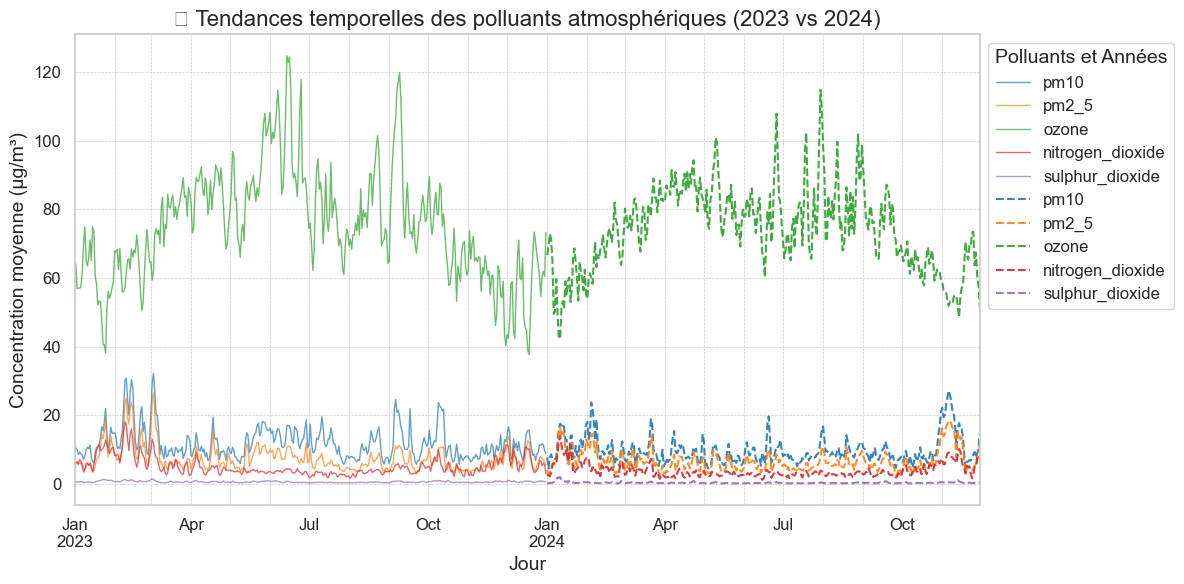

In [32]:
time_trends.index = pd.to_datetime(time_trends.index)
time_trends_2023 = time_trends.loc['2023-01-01':'2023-12-31']
time_trends_2024 = time_trends.loc['2024-01-01':'2024-12-31']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Traçage des tendances pour 2023
time_trends_2023.plot(
    ax=plt.gca(),
    linewidth=1,
    linestyle="-",  # Ligne pleine pour 2023
    alpha=0.7,
    color=sns.color_palette("tab10", n_colors=len(polluants)),
    label=[f"{pollutant} (2023)" for pollutant in polluants]
)
# Traçage des tendances pour 2024
time_trends_2024.plot(
    ax=plt.gca(),
    linewidth=1.5,
    linestyle="--",  # Ligne pointillée pour 2024
    alpha=0.9,
    color=sns.color_palette("tab10", n_colors=len(polluants)),
    label=[f"{pollutant} (2024)" for pollutant in polluants]
)
plt.title("📈 Tendances temporelles des polluants atmosphériques (2023 vs 2024)", fontsize=16)
plt.xlabel("Jour", fontsize=14)
plt.ylabel("Concentration moyenne (µg/m³)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Polluants et Années", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


1. **Ozone (O₃)** :
   - Les concentrations d'ozone suivent une **forte saisonnalité**, atteignant des pics au printemps et en été. 
   - Ces pics pourraient être dus à une augmentation de la photodissociation des polluants en présence de lumière solaire intense.

2. **PM10 et PM2.5** :
   - Les concentrations de particules (PM10 et PM2.5) sont relativement stables sur l'année, avec quelques **pics sporadiques** qui pourraient être liés à des événements ponctuels, comme des feux de forêt, des émissions industrielles, ou des conditions météorologiques spécifiques (vents secs, inversion thermique).
   - Les niveaux sont légèrement plus élevés en hiver, possiblement en raison des émissions provenant du chauffage résidentiel.

3. **Dioxyde d'azote (NO₂)** :
   - Les niveaux de NO₂ sont faibles mais montrent une légère hausse en hiver. Cela pourrait être attribué à une augmentation des émissions liées au transport et au chauffage.

4. **Dioxyde de soufre (SO₂)** :
   - Les concentrations de SO₂ restent très faibles tout au long de l'année. Les faibles émissions pourraient être liées à des régulations strictes sur les combustibles fossiles contenant du soufre.

##### ✨ Comparaison entre 2023 et 2024
- **Tendances générales similaires** :
  - Les deux années montrent des profils de variation similaires, suggérant une cohérence dans les sources d'émission et les conditions météorologiques.
- **Légères différences dans les niveaux de concentration** :
  - Pour certains polluants comme l'ozone, les niveaux de 2024 semblent légèrement inférieurs à ceux de 2023, ce qui pourrait être dû à des variations climatiques ou des politiques environnementales renforcées.

##### 📌 Points Clés à Retenir
- Les concentrations d'ozone présentent une **forte saisonnalité** et des pics marqués en été.
- Les particules fines (PM10 et PM2.5) montrent des **fluctuations ponctuelles** et des niveaux légèrement plus élevés en hiver.
- Les concentrations de NO₂ et SO₂ restent relativement faibles, avec peu de variations notables.

### 🧐 Vérifions si ces tendances sont égalements observées dans chaque région

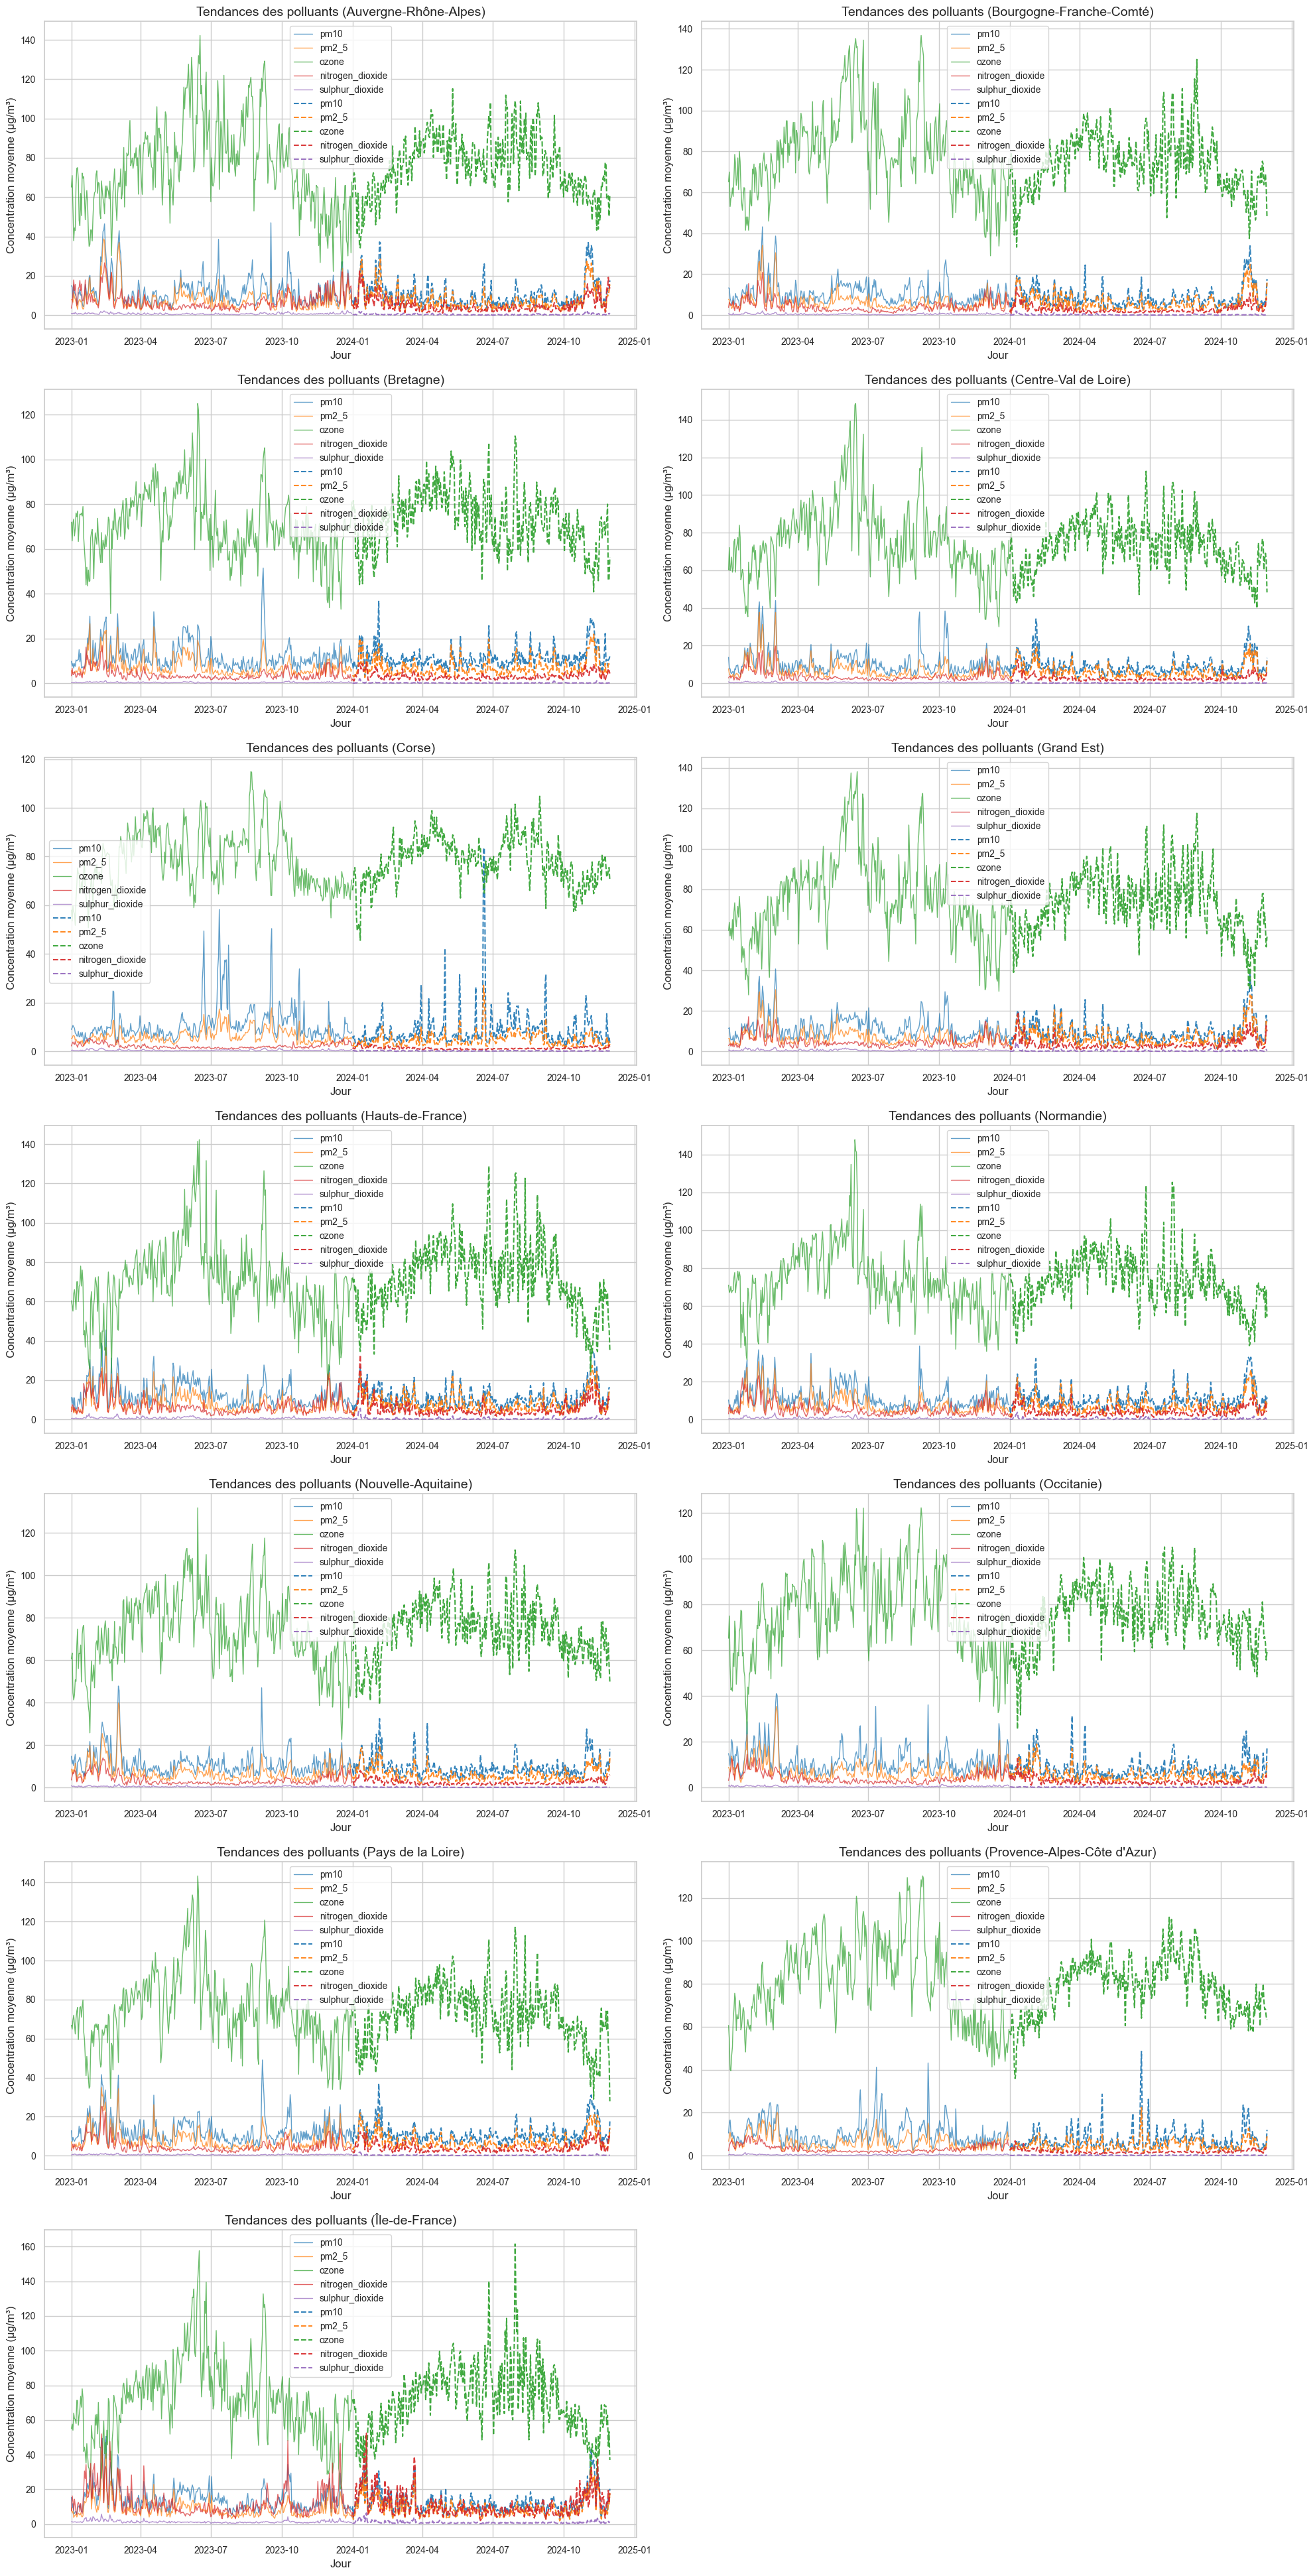

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le DataFrame groupé
time_trends_reg = df_final.groupby(['day', 'region'])[polluants].mean()

# Réinitialiser l'index pour faciliter la manipulation
time_trends_reg = time_trends_reg.reset_index()

# Liste unique des régions
regions = time_trends_reg['region'].unique()

sns.set_theme(style="whitegrid")

# Dimensions des sous-graphiques
fig, axes = plt.subplots(
    nrows=(len(regions) + 1) // 2,  # Calculer le nombre de lignes
    ncols=2,
    figsize=(20, len(regions) * 3)
)
axes = axes.flatten()
for i, region in enumerate(regions):
    # Filtrer les données par région
    region_data = time_trends_reg[time_trends_reg['region'] == region]

    # Filtrer les données par année
    time_trends_2023 = region_data[(region_data['day'].astype("str") >= '2023-01-01') & (region_data['day'].astype("str") <= '2023-12-31')]
    time_trends_2024 = region_data[(region_data['day'].astype("str") >= '2024-01-01') & (region_data['day'].astype("str") <= '2024-12-31')]

    # Traçage des tendances pour 2023
    time_trends_2023.set_index('day')[polluants].plot(
        ax=axes[i],
        linewidth=1,
        linestyle="-",
        alpha=0.7,
        color=sns.color_palette("tab10", n_colors=len(polluants)),
        label=[f"{pollutant} (2023)" for pollutant in polluants]
    )

    # Traçage des tendances pour 2024
    time_trends_2024.set_index('day')[polluants].plot(
        ax=axes[i],
        linewidth=1.5,
        linestyle="--",
        alpha=0.9,
        color=sns.color_palette("tab10", n_colors=len(polluants)),
        label=[f"{pollutant} (2024)" for pollutant in polluants]
    )

    # Ajuster le titre, les axes et la légende
    axes[i].set_title(f"Tendances des polluants ({region})", fontsize=14)
    axes[i].set_xlabel("Jour", fontsize=12)
    axes[i].set_ylabel("Concentration moyenne (µg/m³)", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].legend(fontsize=10)

# Supprimer les axes inutilisés
for j in range(len(regions), len(axes)):
    fig.delaxes(axes[j])

# Ajustement global
plt.tight_layout()
plt.show()


In [34]:
region_data["day"].astype("str")

12      2023-01-01
25      2023-01-02
38      2023-01-03
51      2023-01-04
64      2023-01-05
           ...    
9047    2024-11-26
9060    2024-11-27
9073    2024-11-28
9086    2024-11-29
9099    2024-11-30
Name: day, Length: 700, dtype: object

In [35]:
type("2023-01-01")

str

In [36]:
df1

day  month                region                      date  \
0     2023-01-01      1  Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00   
18    2023-01-02      1  Auvergne-Rhône-Alpes 2023-01-02 11:30:00+00:00   
36    2023-01-03      1  Auvergne-Rhône-Alpes 2023-01-03 11:30:00+00:00   
54    2023-01-04      1  Auvergne-Rhône-Alpes 2023-01-04 11:30:00+00:00   
72    2023-01-05      1  Auvergne-Rhône-Alpes 2023-01-05 11:30:00+00:00   
...          ...    ...                   ...                       ...   
12527 2024-11-26     11         Île-de-France 2024-11-26 11:30:00+00:00   
12545 2024-11-27     11         Île-de-France 2024-11-27 11:30:00+00:00   
12563 2024-11-28     11         Île-de-France 2024-11-28 11:30:00+00:00   
12581 2024-11-29     11         Île-de-France 2024-11-29 11:30:00+00:00   
12599 2024-11-30     11         Île-de-France 2024-11-30 11:30:00+00:00   

            pm10      pm2_5  nitrogen_dioxide  sulphur_dioxide      ozone  \
0      14.954166   7.858334          3.475000         0.837500  62.250000   
18     14.316667   7.962500          5.904167         0.933333  60.208332   
36      8.666667   6.525000         11.420834         0.729167  39.916668   
54     15.504167  11.441667         17.929167         1.075000  27.583334   
72     11.616666   9.070833         12.416667         0.725000  36.916668   
...          ...        ...               ...              ...        ...   
12527  12.691667   8.512500         13.220833         0.916667  48.250000   
12545   7.362500   5.725000         11.762500         0.775000  51.750000   
12563  14.870833  12.295834         19.445833         1.537500  35.708332   
12581  14.041667  11.537499         12.087501         0.920833  44.166668   
12599  20.308332  17.858334         17.637501         1.420833  22.916666   

       temperature_2m  relative_humidity_2m  precipitation  surface_pressure  \
0           11.954083             71.024551       0.000000        964.791809   
18          10.583250             76.024849       0.550000        965.794250   
36           6.727000             87.053253       0.125000        971.449707   
54           5.220750             84.029167       0.000000        972.121399   
72           7.531167             89.476860       0.016667        968.975586   
...               ...                   ...            ...               ...   
12527        8.658334             88.946800       0.108333       1014.152649   
12545       10.439584             91.109230       0.254167       1012.352295   
12563        6.358334             84.380318       0.004167       1022.028015   
12581        3.558333             85.608681       0.000000       1023.345276   
12599        2.770833             90.716217       0.000000       1021.944885   

       wind_speed_10m  longitude   latitude  
0           23.574928   4.536119  45.514642  
18          15.330505   4.536119  45.514642  
36           5.034335   4.536119  45.514642  
54           4.557892   4.536119  45.514642  
72           5.073804   4.536119  45.514642  
...               ...        ...        ...  
12527       11.292778   2.503401  48.709316  
12545       17.599253   2.503401  48.709316  
12563        6.830119   2.503401  48.709316  
12581        9.613878   2.503401  48.709316  
12599        4.865319   2.503401  48.709316  

[9100 rows x 16 columns]

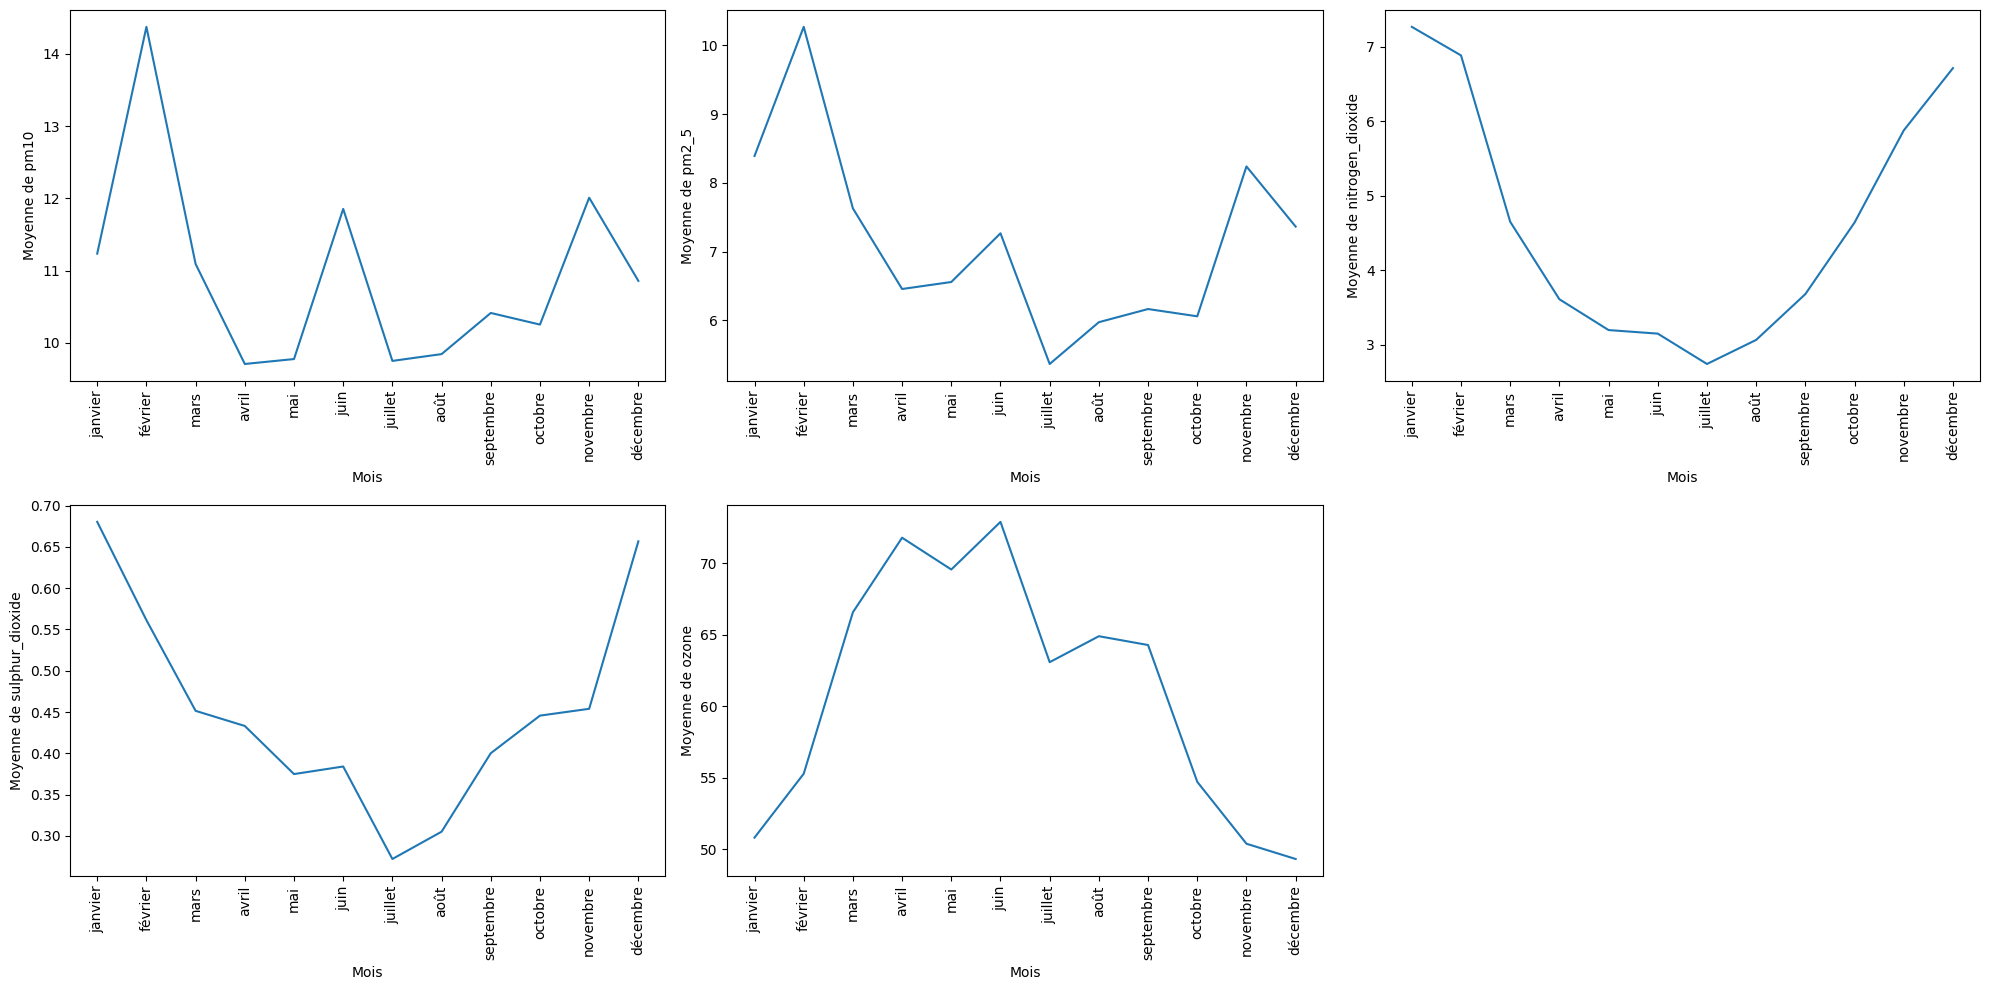

In [30]:
import seaborn as sns
variables_air_month=["pm10", "pm2_5", "nitrogen_dioxide", "sulphur_dioxide", "ozone","month"]
df_air_month=df1[variables_air_month].groupby("month").mean()

# Initialiser une figure pour afficher les graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Afficher un graphique pour chaque variable
for i, column in enumerate(df_air_month):
    ax = axes[i//3, i%3]
    sns.lineplot(x=df_air_month.index, y=df_air_month[column], ax=ax)
    #axes[i].set_title(f'Moyenne de {column} par mois')
    ax.set_xlabel('Mois')
    ax.set_ylabel(f'Moyenne de {column}')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(df_air_month.index)  # Définit les ticks de l'axe des X aux valeurs des mois
    ax.set_xticklabels([month_dict[m] for m in df_air_month.index])


# Masquer le dernier cadre inutilisé
axes[-1, -1].set_visible(False)
    
# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [38]:
variables_air_region=["pm10", "pm2_5", "nitrogen_dioxide", "sulphur_dioxide", "ozone","region","longitude","latitude"]
df_air_region=df_final[variables_air_region].groupby(["region"]).mean()


In [39]:
df_air_region

pm10     pm2_5  nitrogen_dioxide  \
region                                                              
Auvergne-Rhône-Alpes        11.391398  8.019738          6.163274   
Bourgogne-Franche-Comté      9.689458  6.438536          3.534101   
Bretagne                    11.905880  7.311768          3.597988   
Centre-Val de Loire          9.917185  6.694089          3.169827   
Corse                        9.848196  5.443572          1.727952   
Grand Est                   10.403630  7.027137          4.012548   
Hauts-de-France             12.268559  8.227059          6.272761   
Normandie                   11.407137  7.601459          4.785083   
Nouvelle-Aquitaine          10.411905  6.652667          3.004595   
Occitanie                   10.052964  6.451458          3.409214   
Pays de la Loire            11.940191  7.588369          4.541827   
Provence-Alpes-Côte d'Azur   8.852309  5.616756          2.604155   
Île-de-France               13.709042  9.406375         11.921513   

                            sulphur_dioxide      ozone  longitude   latitude  
region                                                                        
Auvergne-Rhône-Alpes               0.549964  75.628952   4.536119  45.514642  
Bourgogne-Franche-Comté            0.337881  76.773442   4.806857  47.234282  
Bretagne                           0.318262  71.608891  -2.841463  48.177549  
Centre-Val de Loire                0.282143  74.808233   1.684391  47.484775  
Corse                              0.332905  78.523585   9.106152  42.151511  
Grand Est                          0.412583  74.597988   5.613112  48.688977  
Hauts-de-France                    0.555869  70.917417   2.771303  49.969594  
Normandie                          0.499726  73.473682   0.110932  49.120067  
Nouvelle-Aquitaine                 0.309143  73.582500   0.212719  45.206040  
Occitanie                          0.315976  75.712520   2.143923  43.702500  
Pays de la Loire                   0.386280  73.714162  -0.816786  47.478104  
Provence-Alpes-Côte d'Azur         0.260893  79.746094   6.061005  43.958789  
Île-de-France                      1.185018  71.693019   2.503401  48.709316

In [40]:
df_air_region["LIBELLE_REGION"] = df_air_region.index
gd=france.merge(df_air_region, on="LIBELLE_REGION",how="inner")

In [41]:
gd=gd.to_crs(3857)

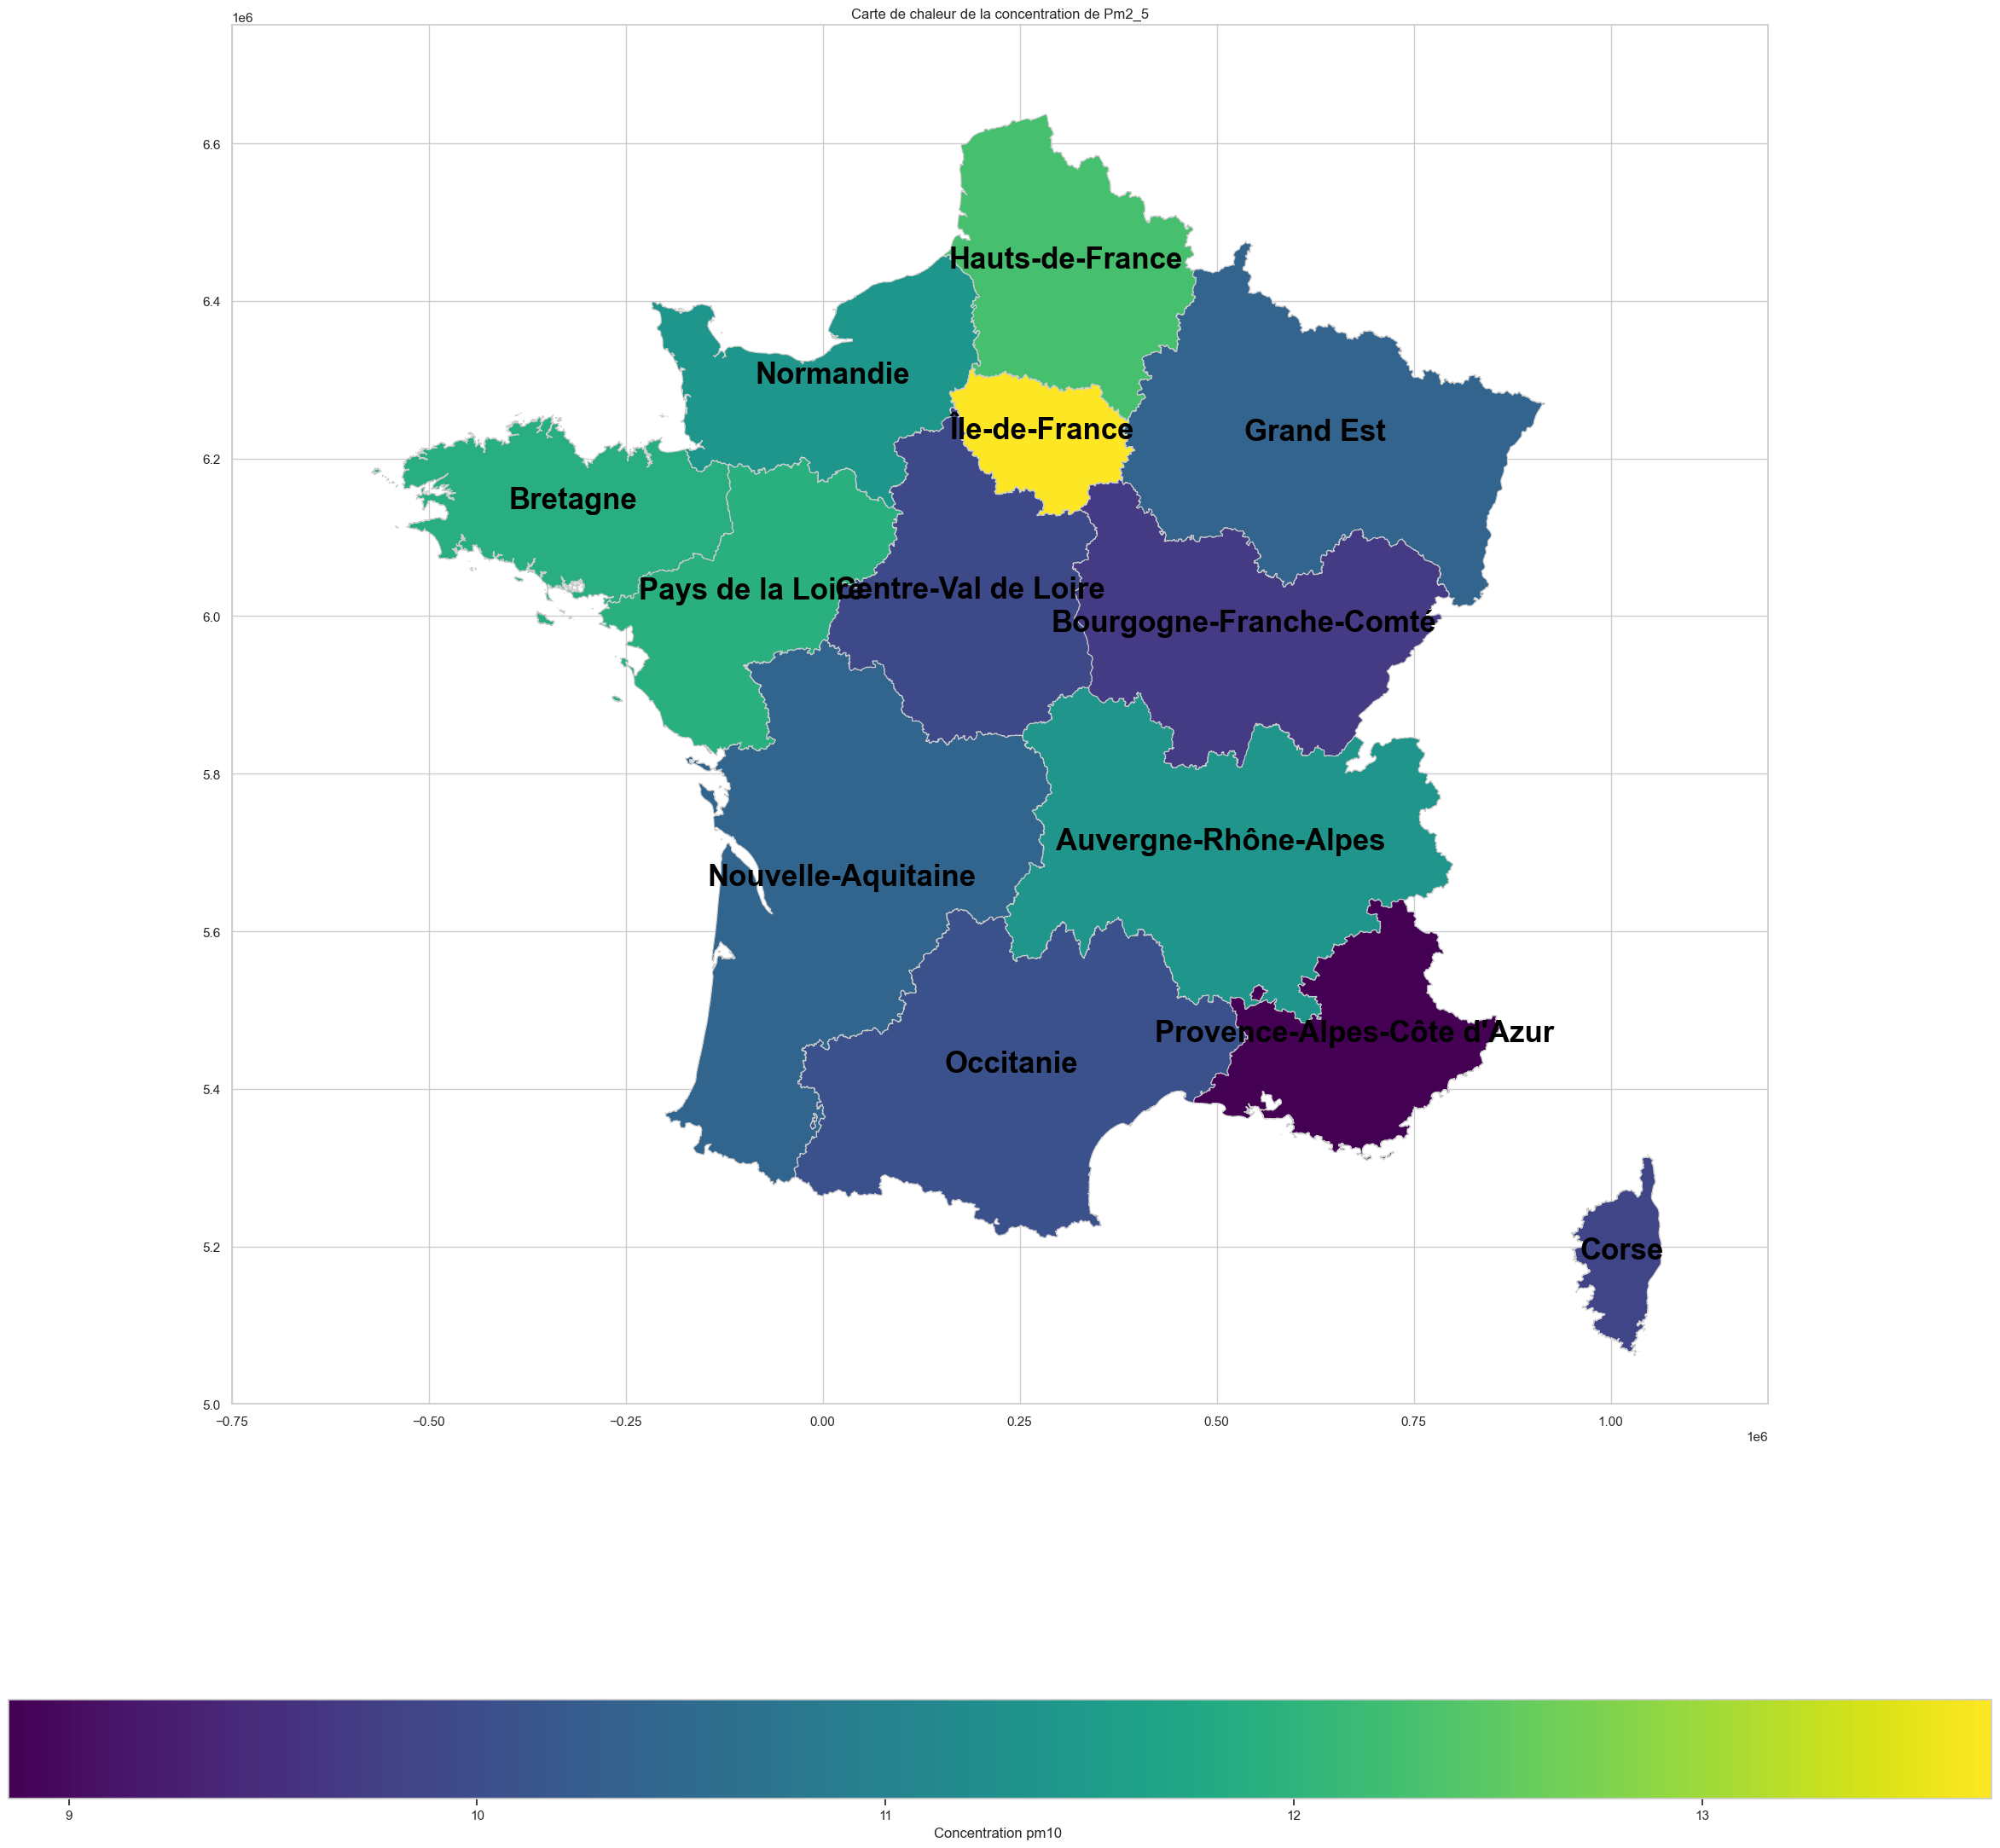

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# Définir la palette de couleurs et la normalisation pour la variable
norm = mpl.colors.Normalize(vmin=gd['pm10'].min(), vmax=gd['pm10'].max())
cmap = plt.cm.viridis  # Choisissez votre palette de couleurs (par ex. viridis, plasma, etc.)

# Afficher la carte avec la coloration proportionnelle à la concentration de NO2

gd.plot(column='pm10', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, legend_kwds={'label': "Concentration pm10 ", 'orientation': "horizontal"})
# Ajuster les limites de l'axe pour que le cadre soit centré sur les géométries
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#ax.set_xlim(bounds[0], bounds[2])  # minx, maxx
#ax.set_ylim(bounds[1], bounds[3])  # miny, maxy
# Ajouter un titre
ax.set_title("Carte de chaleur de la concentration de Pm2_5")

for idx, row in gd.iterrows():
    #Récupérer le centroïde de chaque région pour le positionner correctement
    centroid = row['geometry'].centroid
    #Ajouter le nom de la région au centroïde de la géométrie
    ax.text(centroid.x, centroid.y, row['LIBELLE_REGION'], fontsize=25, ha='center', color='black', weight='bold')

# Afficher la carte
plt.show()

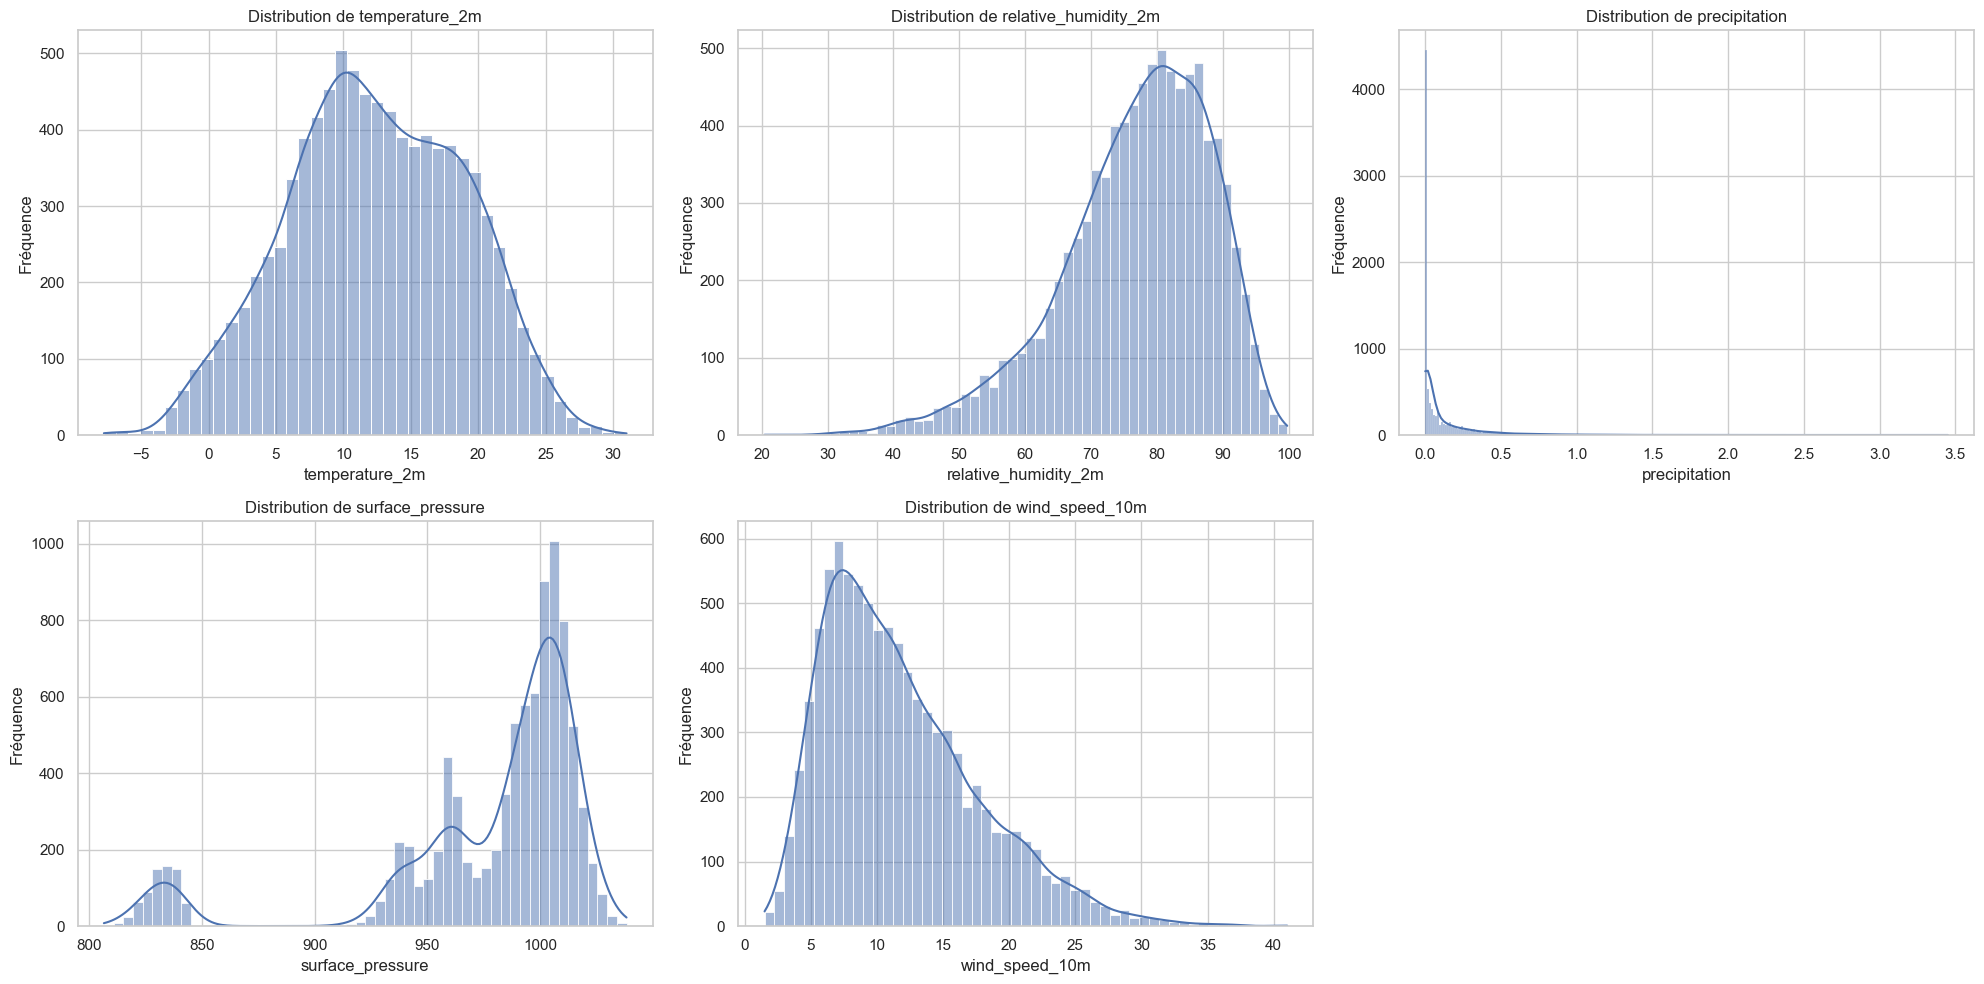

In [43]:
import math
#Liste des variables d'intérêt
var_climat = ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]

# Calcul du nombre de lignes et colonnes nécessaires
n_vars = len(var_climat)
n_cols = 3  # Nombre de colonnes souhaité
n_rows = math.ceil(n_vars / n_cols)  # Calculer dynamiquement le nombre de lignes

# Initialiser une figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Aplatir les axes pour itérer facilement (si n_rows > 1)
axes = axes.flatten()

# Boucle pour créer un histogramme pour chaque variable
for i, variable in enumerate(var_climat):
    sns.histplot(data=df_final, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {variable}")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Fréquence")

# Masquer les axes inutilisés (s'il y en a)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Matrice de Corrélation')

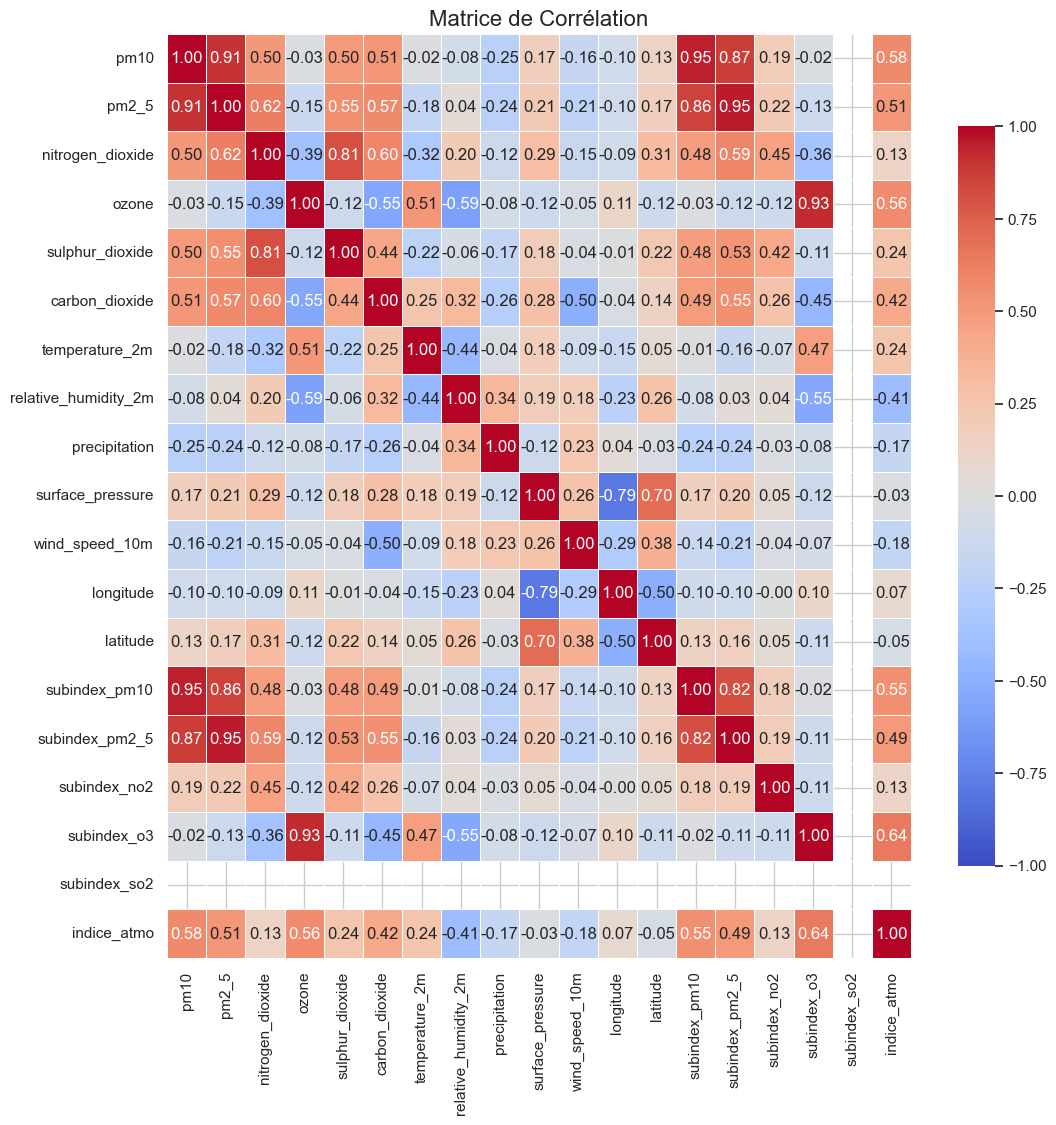

In [44]:
import numpy as np
corr_matrix = df_final.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 12))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})

# Titre
plt.title('Matrice de Corrélation', fontsize=16)

In [45]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
df_idf = df_final[df_final["region"]=="Île-de-France"]
df_idf

day         region       pm10      pm2_5  nitrogen_dioxide  \
9100  2023-01-01  Île-de-France  15.383334   9.358334          7.616667   
9101  2023-01-02  Île-de-France   9.312500   6.445833         16.291666   
9102  2023-01-03  Île-de-France  11.849999   7.379167         13.200000   
9103  2023-01-04  Île-de-France   5.800000   3.862500          7.841667   
9104  2023-01-05  Île-de-France   6.237500   4.679166         14.345833   
...          ...            ...        ...        ...               ...   
9795  2024-11-26  Île-de-France  12.691667   8.512500         13.220833   
9796  2024-11-27  Île-de-France   7.362500   5.725000         11.762500   
9797  2024-11-28  Île-de-France  14.870833  12.295834         19.445833   
9798  2024-11-29  Île-de-France  14.041667  11.537499         12.087501   
9799  2024-11-30  Île-de-France  20.308332  17.858334         17.637501   

          ozone  sulphur_dioxide  carbon_dioxide  temperature_2m  \
9100  55.000000         1.375000             NaN       13.652084   
9101  57.625000         1.337500             NaN       10.062500   
9102  54.125000         1.141667             NaN        7.752083   
9103  64.000000         1.187500             NaN       11.695834   
9104  60.666667         1.300000             NaN       12.356251   
...         ...              ...             ...             ...   
9795  57.375000         0.916667      449.125000        8.658334   
9796  62.750000         0.775000      446.583344       10.439584   
9797  45.000000         1.537500      459.791656        6.358334   
9798  53.250000         0.920833      450.000000        3.558333   
9799  37.000000         1.420833      463.250000        2.770833   

      relative_humidity_2m  ...  surface_pressure  wind_speed_10m  longitude  \
9100             71.534920  ...       1009.788025       19.753124   2.503401   
9101             89.010780  ...       1015.033752       13.947431   2.503401   
9102             91.482140  ...       1022.744385       16.570414   2.503401   
9103             89.660561  ...       1019.289001       25.613174   2.503401   
9104             88.560097  ...       1019.476074       15.305164   2.503401   
...                    ...  ...               ...             ...        ...   
9795             88.946800  ...       1014.152649       11.292778   2.503401   
9796             91.109230  ...       1012.352295       17.599253   2.503401   
9797             84.380318  ...       1022.028015        6.830119   2.503401   
9798             85.608681  ...       1023.345276        9.613878   2.503401   
9799             90.716217  ...       1021.944885        4.865319   2.503401   

       latitude  subindex_pm10  subindex_pm2_5  subindex_no2  subindex_o3  \
9100  48.709316              3               2             1            3   
9101  48.709316              2               2             1            3   
9102  48.709316              2               2             1            3   
9103  48.709316              1               1             1            3   
9104  48.709316              2               1             1            3   
...         ...            ...             ...           ...          ...   
9795  48.709316              2               2             1            3   
9796  48.709316              2               2             1            3   
9797  48.709316              3               3             1            2   
9798  48.709316              3               3             1            2   
9799  48.709316              4               4             1            2   

      subindex_so2  indice_atmo  
9100             1            3  
9101             1            3  
9102             1            3  
9103             1            3  
9104             1            3  
...            ...          ...  
9795             1            3  
9796             1            3  
9797             1            3  
9798             1            3  
9799             1            4  



In [32]:
###  juste pour tester les fonctions suivantes car "base finale" dérange plus haut
#df=df.drop(columns="carbon_dioxide")
#df_idf = df1[df1["region"]=="Île-de-France"]
#df_idf

day  month         region                      date  longitude  \
17    2023-01-01      1  Île-de-France 2023-01-01 11:30:00+00:00   2.503401   
35    2023-01-02      1  Île-de-France 2023-01-02 11:30:00+00:00   2.503401   
53    2023-01-03      1  Île-de-France 2023-01-03 11:30:00+00:00   2.503401   
71    2023-01-04      1  Île-de-France 2023-01-04 11:30:00+00:00   2.503401   
89    2023-01-05      1  Île-de-France 2023-01-05 11:30:00+00:00   2.503401   
...          ...    ...            ...                       ...        ...   
12527 2024-11-26     11  Île-de-France 2024-11-26 11:30:00+00:00   2.503401   
12545 2024-11-27     11  Île-de-France 2024-11-27 11:30:00+00:00   2.503401   
12563 2024-11-28     11  Île-de-France 2024-11-28 11:30:00+00:00   2.503401   
12581 2024-11-29     11  Île-de-France 2024-11-29 11:30:00+00:00   2.503401   
12599 2024-11-30     11  Île-de-France 2024-11-30 11:30:00+00:00   2.503401   

        latitude       pm10      pm2_5  nitrogen_dioxide  sulphur_dioxide  \
17     48.709316  15.383334   9.358334          7.616667         1.375000   
35     48.709316   9.312500   6.445833         16.291666         1.337500   
53     48.709316  11.849999   7.379167         13.200000         1.141667   
71     48.709316   5.800000   3.862500          7.841667         1.187500   
89     48.709316   6.237500   4.679166         14.345833         1.300000   
...          ...        ...        ...               ...              ...   
12527  48.709316  12.691667   8.512500         13.220833         0.916667   
12545  48.709316   7.362500   5.725000         11.762500         0.775000   
12563  48.709316  14.870833  12.295834         19.445833         1.537500   
12581  48.709316  14.041667  11.537499         12.087501         0.920833   
12599  48.709316  20.308332  17.858334         17.637501         1.420833   

           ozone  longitude   latitude  temperature_2m  relative_humidity_2m  \
17     46.500000   2.503401  48.709316       13.652084             71.534920   
35     49.625000   2.503401  48.709316       10.062500             89.010780   
53     45.166668   2.503401  48.709316        7.752083             91.482140   
71     57.375000   2.503401  48.709316       11.695834             89.660561   
89     51.375000   2.503401  48.709316       12.356251             88.560097   
...          ...        ...        ...             ...                   ...   
12527  48.250000   2.503401  48.709316        8.658334             88.946800   
12545  51.750000   2.503401  48.709316       10.439584             91.109230   
12563  35.708332   2.503401  48.709316        6.358334             84.380318   
12581  44.166668   2.503401  48.709316        3.558333             85.608681   
12599  22.916666   2.503401  48.709316        2.770833             90.716217   

       precipitation  surface_pressure  wind_speed_10m  
17          0.079167       1009.788025       19.753124  
35          0.404167       1015.033752       13.947431  
53          0.062500       1022.744385       16.570414  
71          0.112500       1019.289001       25.613174  
89          0.020833       1019.476074       15.305164  
...              ...               ...             ...  
12527       0.108333       1014.152649       11.292778  
12545       0.254167       1012.352295       17.599253  
12563       0.004167       1022.028015        6.830119  
12581       0.000000       1023.345276        9.613878  
12599       0.000000       1021.944885        4.865319  

[700 rows x 18 columns]

In [33]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
df_idf.shape

(700, 18)

In [49]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_idf["pm10"])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistic: -4.543861303729894
P-Value: 0.00016370672299803759


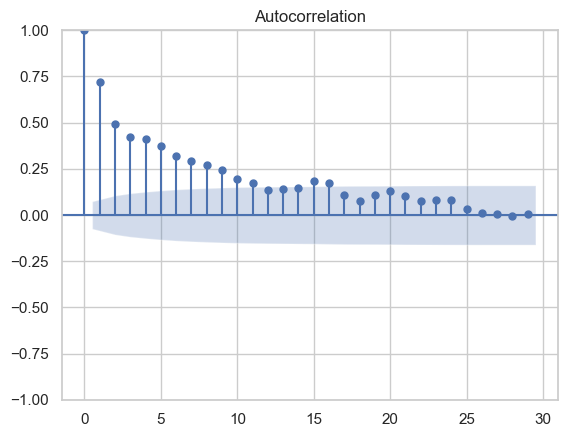

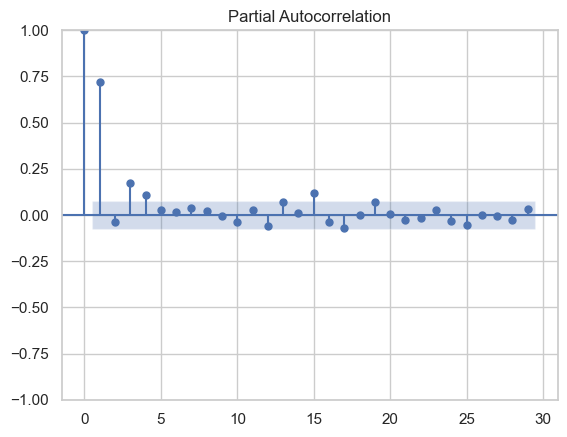

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_idf["pm10"])
plot_pacf(df_idf["pm10"])
plt.show()

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


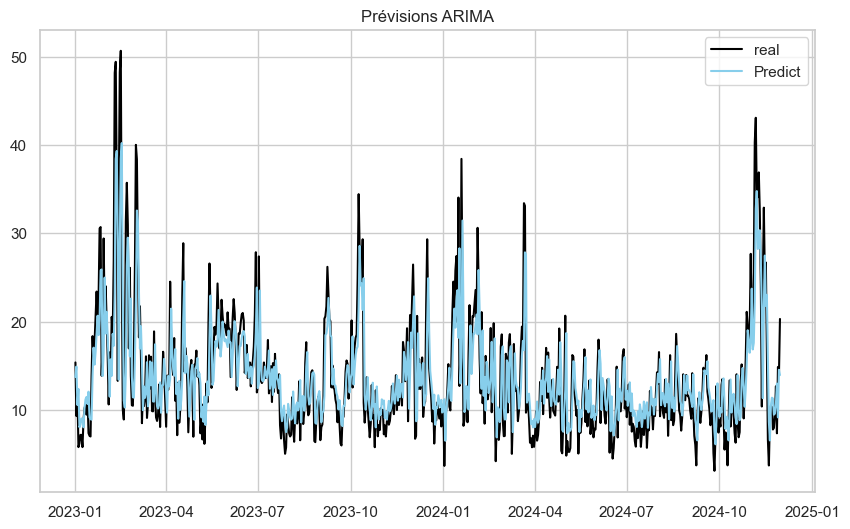

In [51]:
# ARIMA LİBRARY
from statsmodels.tsa.arima.model import ARIMA
#from pandas import datetime

# fit model
model = ARIMA(df_idf["pm10"], order=(1,0,0)) 
model_fit = model.fit()

#prediction
plt.figure(figsize=(10, 6))
plt.plot(df_idf["day"],df_idf["pm10"], label="real",color="black")
plt.plot(df_idf["day"],model_fit.predict(), label="Predict", color='skyblue')
plt.title("Prévisions ARIMA")
plt.legend()
plt.show()


c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


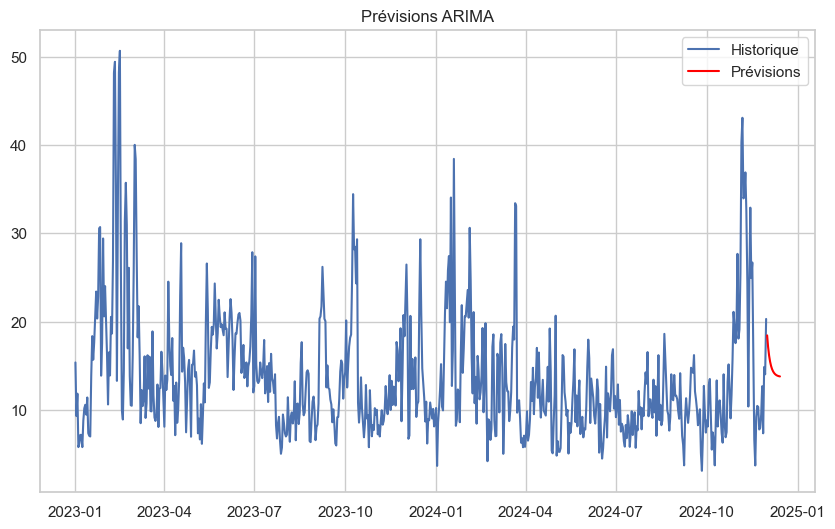

In [52]:
#forecast
forecast_steps = 14 #2semaines
forecast = model_fit.forecast(steps=forecast_steps)
# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(df_idf["day"],df_idf["pm10"], label="Historique")
plt.plot(pd.date_range(max(df_idf["day"]), periods=forecast_steps+1, freq='D')[1:], 
         forecast, label="Prévisions", color='red')
plt.title("Prévisions ARIMA")
plt.legend()
plt.show()

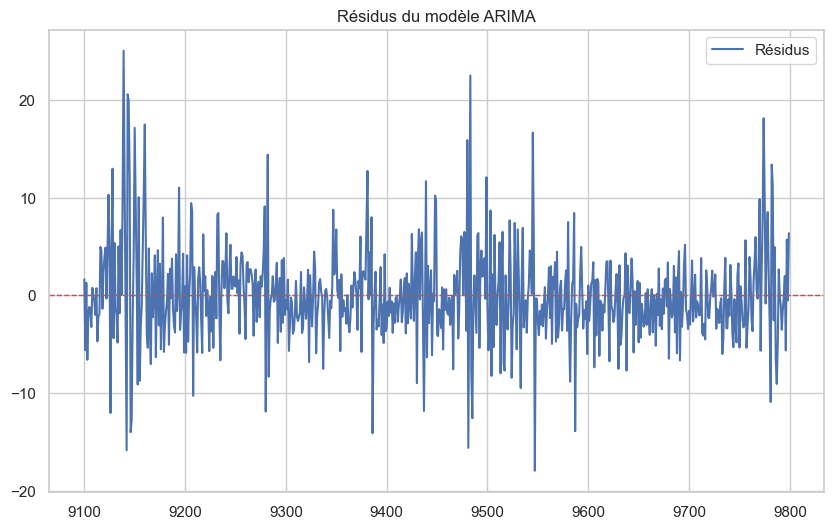

In [53]:
# Visualisation des résidus
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Résidus")
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Résidus du modèle ARIMA")
plt.legend()
plt.show()

In [83]:
import importlib
from scripts import modele  # Supposez que votre module est `scripts.api`

# Rechargez le module
importlib.reload(modele)

<module 'scripts.modele' from 'c:\\Users\\steph\\Documents\\ENSAE\\Python pour la data science\\Projet_Python_2024-1\\scripts\\modele.py'>

La série est stationnaire.


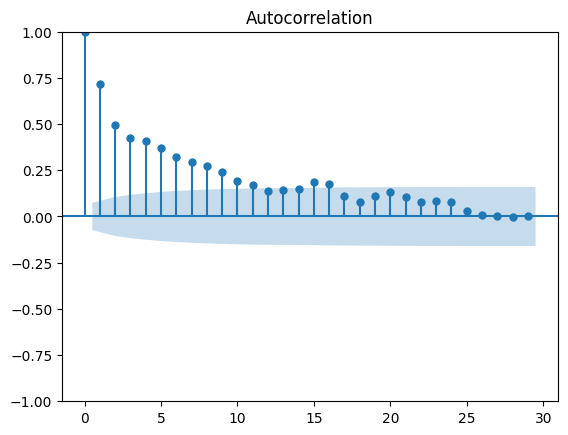

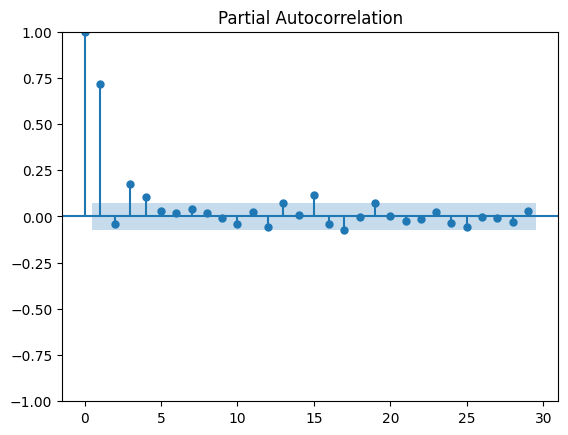

In [51]:

from scripts import modele
modele.stationarity_acf(df_idf,"pm10")



c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


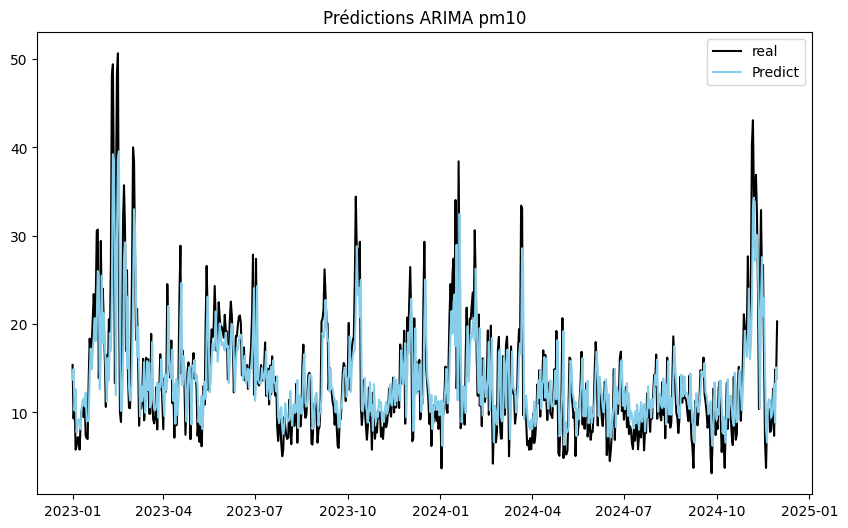

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


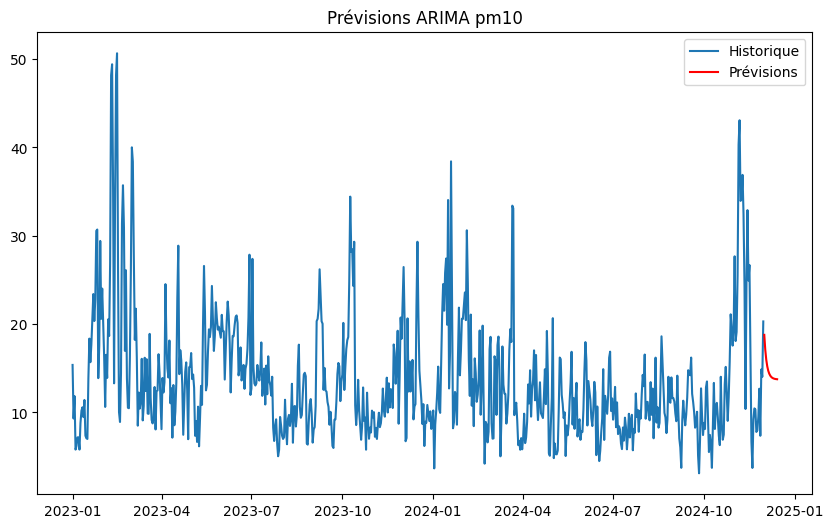

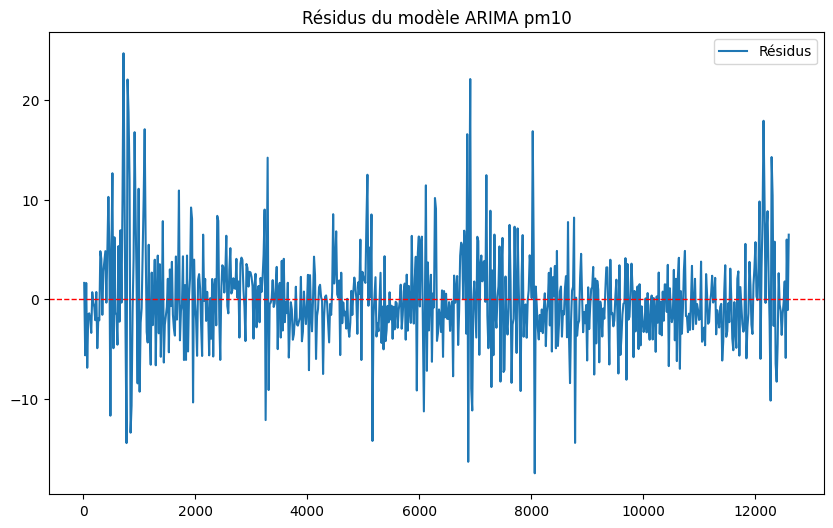

In [52]:
model_fit_pm10 = modele.fit_arima(df_idf,"pm10",1,0,1)
modele.prediction_arima(df_idf,"pm10",model_fit_pm10)
forecast_pm10 = modele.prevision_arima(df_idf,"pm10",model_fit_pm10)
modele.residus(df_idf,"pm10",model_fit_pm10)

In [54]:
#from sklearn.metrics import mean_squared_error

#mse = mean_squared_error(data['value'].iloc[1:], data['fitted'].iloc[1:])
#rmse = np.sqrt(mse)
#print(f"RMSE: {rmse:.2f}")

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [69]:
#df_idf.set_index("day",inplace=True)
df_idf_var =  df_idf[['day','pm10', 'pm2_5', "ozone" ,'nitrogen_dioxide', 'sulphur_dioxide',"temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]].set_index("day")
df_idf_var = pd.DataFrame(scaler.fit_transform(df_idf_var), columns=df_idf_var.columns, index=df_idf_var.index)
#train_size = int(len(df_idf_var) * 0.95) #entrainement 90%
#train, test = df_idf_var[:train_size], df_idf_var[train_size:]
train = df_idf_var

In [87]:
df_idf_var

pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide  \
day                                                                           
2023-01-01  0.240121 -0.008347 -0.505990         -0.556502         0.247064   
2023-01-02 -0.630537 -0.514383 -0.320457          0.564945         0.198297   
2023-01-03 -0.266617 -0.352220 -0.585151          0.165275        -0.056377   
2023-01-04 -1.134287 -0.963228  0.139666         -0.527416         0.003228   
2023-01-05 -1.071543 -0.821335 -0.216558          0.313400         0.149530   
...              ...       ...       ...               ...              ...   
2024-11-26 -0.145908 -0.155307 -0.402091          0.167968        -0.348980   
2024-11-27 -0.910199 -0.639625 -0.194294         -0.020556        -0.533212   
2024-11-28  0.166620  0.502033 -1.146699          0.972695         0.458389   
2024-11-29  0.047704  0.370275 -0.644522          0.021458        -0.343561   
2024-11-30  0.946447  1.468496 -1.906149          0.738926         0.306668   

            temperature_2m  relative_humidity_2m  precipitation  \
day                                                               
2023-01-01        0.096452             -0.674185      -0.176358   
2023-01-02       -0.486798              1.110819       1.402707   
2023-01-03       -0.862204              1.363247      -0.257336   
2023-01-04       -0.221408              1.177189      -0.014402   
2023-01-05       -0.114100              1.064786      -0.459780   
...                    ...                   ...            ...   
2024-11-26       -0.714953              1.104284      -0.034647   
2024-11-27       -0.425528              1.325158       0.673908   
2024-11-28       -1.088666              0.637859      -0.540757   
2024-11-29       -1.543621              0.763325      -0.561002   
2024-11-30       -1.671577              1.285015      -0.561002   

            surface_pressure  wind_speed_10m  
day                                           
2023-01-01         -0.053938        1.133370  
2023-01-02          0.491810        0.116135  
2023-01-03          1.293998        0.575717  
2023-01-04          0.934511        2.160129  
2023-01-05          0.953974        0.354028  
...                      ...             ...  
2024-11-26          0.400143       -0.348995  
2024-11-27          0.212840        0.755983  
2024-11-28          1.219469       -1.130912  
2024-11-29          1.356512       -0.643161  
2024-11-30          1.210820       -1.475171  

[700 rows x 10 columns]

In [71]:
#selection ordre du modèle
from statsmodels.tsa.api import VAR

# Initialiser le modèle
model = VAR(train)

# Sélection de l'ordre optimal
selected_order = model.select_order(maxlags=15)  # Ajustez maxlags en fonction des données
print(selected_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -8.518      -8.452   0.0001998      -8.492
1       -15.58     -14.85*   1.717e-07      -15.30
2      -15.85*      -14.46  1.313e-07*     -15.31*
3       -15.82      -13.77   1.352e-07      -15.02
4       -15.71      -13.00   1.508e-07      -14.66
5       -15.62      -12.24   1.658e-07      -14.31
6       -15.49      -11.45   1.887e-07      -13.93
7       -15.42      -10.73   2.016e-07      -13.61
8       -15.28      -9.921   2.346e-07      -13.20
9       -15.15      -9.131   2.681e-07      -12.82
10      -15.06      -8.383   2.940e-07      -12.48
11      -14.96      -7.620   3.280e-07      -12.12
12      -14.87      -6.868   3.619e-07      -11.77
13      -14.88      -6.218   3.617e-07      -11.53
14      -14.77      -5.443   4.101e-07      -11.16
15      -14.73      -4.748   4.301e-07      -10.87
-------------------------------

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [72]:
optimal_lag = selected_order.aic
optimal_lag

np.int64(2)

In [98]:
# Fitting the VAR model with the optimal lag
optimal_lag=1
var_model = model.fit(optimal_lag)

# Summary of the VAR model
var_model_summary = var_model.summary()
var_model_summary

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 22, Dec, 2024
Time:                     23:37:38
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -14.8815
Nobs:                     699.000    HQIC:                  -15.3207
Log likelihood:          -4357.07    FPE:                1.68315e-07
AIC:                     -15.5975    Det(Omega_mle):     1.43983e-07
--------------------------------------------------------------------
Results for equation pm10
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.000669         0.025653            0.026           0.979
L1.pm10                         0.591770         0.097615            6.062           0.000
L1.pm2_5             

In [74]:
# Faire des prédictions
forecast_steps = 14
forecast = var_model.forecast(y=train.values, steps=forecast_steps)

# Convertir les prévisions en DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(max(df_idf["day"]), periods=forecast_steps+1, freq='D')[1:], columns=df_idf_var.columns)
forecast_df



pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide  \
2024-12-01  0.708656  1.219534 -1.500712          0.744422         0.462605   
2024-12-02  0.552345  0.985035 -1.191568          0.680357         0.484065   
2024-12-03  0.452390  0.806286 -0.963160          0.611635         0.473240   
2024-12-04  0.385852  0.675871 -0.797031          0.551492         0.453477   
2024-12-05  0.339683  0.580894 -0.675688          0.501729         0.432483   
2024-12-06  0.306062  0.510505 -0.585848          0.460903         0.412328   
2024-12-07  0.280230  0.456893 -0.518070          0.427011         0.393278   
2024-12-08  0.259299  0.414739 -0.465789          0.398299         0.375153   
2024-12-09  0.241534  0.380509 -0.424481          0.373430         0.357762   
2024-12-10  0.225907  0.351879 -0.391023          0.351450         0.340999   
2024-12-11  0.211821  0.327320 -0.363258          0.331697         0.324832   
2024-12-12  0.198932  0.305824 -0.339688          0.313718         0.309277   
2024-12-13  0.187041  0.286714 -0.319263          0.297202         0.294360   
2024-12-14  0.176029  0.269532 -0.301247          0.281928         0.280111   

            temperature_2m  relative_humidity_2m  precipitation  \
2024-12-01       -1.287423              1.080813      -0.335506   
2024-12-02       -1.117705              0.963840      -0.181933   
2024-12-03       -1.021626              0.858610      -0.136218   
2024-12-04       -0.953325              0.763026      -0.120885   
2024-12-05       -0.897436              0.678660      -0.113879   
2024-12-06       -0.848309              0.606140      -0.108656   
2024-12-07       -0.803621              0.544864      -0.103431   
2024-12-08       -0.762293              0.493534      -0.097875   
2024-12-09       -0.723754              0.450614      -0.092085   
2024-12-10       -0.687661              0.414603      -0.086243   
2024-12-11       -0.653778              0.384167      -0.080517   
2024-12-12       -0.621924              0.358181      -0.075029   
2024-12-13       -0.591947              0.335730      -0.069860   
2024-12-14       -0.563712              0.316086      -0.065052   

            surface_pressure  wind_speed_10m  
2024-12-01          0.771572       -0.578345  
2024-12-02          0.574619       -0.233974  
2024-12-03          0.468811       -0.077428  
2024-12-04          0.398485        0.006782  
2024-12-05          0.345014        0.056634  
2024-12-06          0.301427        0.087061  
2024-12-07          0.264720        0.105350  
2024-12-08          0.233354        0.115729  
2024-12-09          0.206387        0.120895  
2024-12-10          0.183153        0.122627  
2024-12-11          0.163125        0.122115  
2024-12-12          0.145865        0.120153  
2024-12-13          0.130993        0.117268  
2024-12-14          0.118178        0.113813

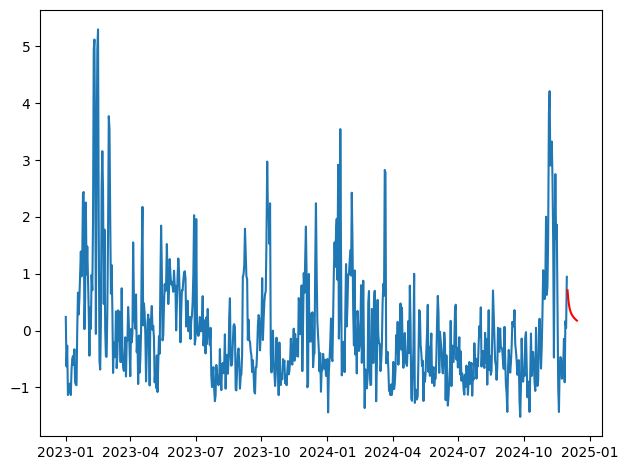

In [ ]:
# Visualiser les prévisions
plt.Figure((10,5))
plt.plot(df_idf_var.index,df_idf_var["pm10"], label="Historique")
plt.plot(pd.date_range(max(df_idf_var.index), periods=forecast_steps+1, freq='D')[1:],
         forecast_df["pm10"],label="prevision VAR pm10",color="red")
plt.tight_layout()
plt.show()

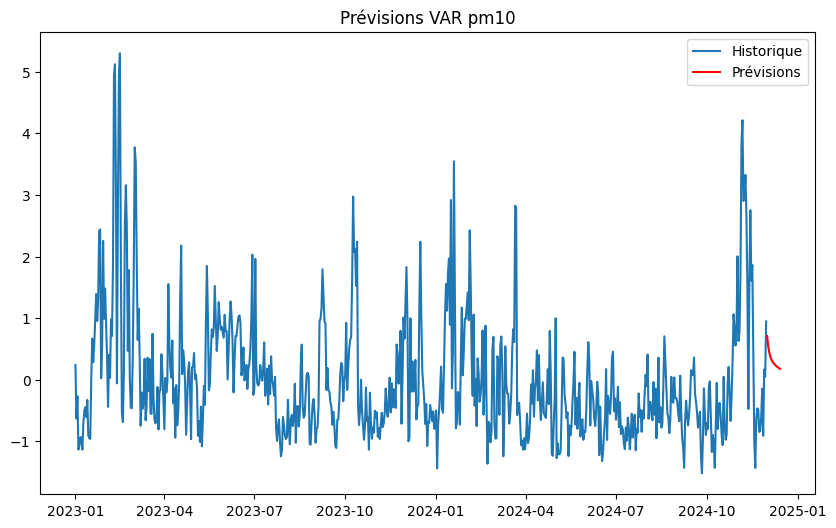

pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide  \
2024-12-01  0.708656  1.219534 -1.500712          0.744422         0.462605   
2024-12-02  0.552345  0.985035 -1.191568          0.680357         0.484065   
2024-12-03  0.452390  0.806286 -0.963160          0.611635         0.473240   
2024-12-04  0.385852  0.675871 -0.797031          0.551492         0.453477   
2024-12-05  0.339683  0.580894 -0.675688          0.501729         0.432483   
2024-12-06  0.306062  0.510505 -0.585848          0.460903         0.412328   
2024-12-07  0.280230  0.456893 -0.518070          0.427011         0.393278   
2024-12-08  0.259299  0.414739 -0.465789          0.398299         0.375153   
2024-12-09  0.241534  0.380509 -0.424481          0.373430         0.357762   
2024-12-10  0.225907  0.351879 -0.391023          0.351450         0.340999   
2024-12-11  0.211821  0.327320 -0.363258          0.331697         0.324832   
2024-12-12  0.198932  0.305824 -0.339688          0.313718         0.309277   
2024-12-13  0.187041  0.286714 -0.319263          0.297202         0.294360   
2024-12-14  0.176029  0.269532 -0.301247          0.281928         0.280111   

            temperature_2m  relative_humidity_2m  precipitation  \
2024-12-01       -1.287423              1.080813      -0.335506   
2024-12-02       -1.117705              0.963840      -0.181933   
2024-12-03       -1.021626              0.858610      -0.136218   
2024-12-04       -0.953325              0.763026      -0.120885   
2024-12-05       -0.897436              0.678660      -0.113879   
2024-12-06       -0.848309              0.606140      -0.108656   
2024-12-07       -0.803621              0.544864      -0.103431   
2024-12-08       -0.762293              0.493534      -0.097875   
2024-12-09       -0.723754              0.450614      -0.092085   
2024-12-10       -0.687661              0.414603      -0.086243   
2024-12-11       -0.653778              0.384167      -0.080517   
2024-12-12       -0.621924              0.358181      -0.075029   
2024-12-13       -0.591947              0.335730      -0.069860   
2024-12-14       -0.563712              0.316086      -0.065052   

            surface_pressure  wind_speed_10m  
2024-12-01          0.771572       -0.578345  
2024-12-02          0.574619       -0.233974  
2024-12-03          0.468811       -0.077428  
2024-12-04          0.398485        0.006782  
2024-12-05          0.345014        0.056634  
2024-12-06          0.301427        0.087061  
2024-12-07          0.264720        0.105350  
2024-12-08          0.233354        0.115729  
2024-12-09          0.206387        0.120895  
2024-12-10          0.183153        0.122627  
2024-12-11          0.163125        0.122115  
2024-12-12          0.145865        0.120153  
2024-12-13          0.130993        0.117268  
2024-12-14          0.118178        0.113813

In [102]:
modele.prevision_var(df_idf_var,"pm10",var_model)

In [91]:
df_idf_var

pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide  \
day                                                                           
2023-01-01  0.240121 -0.008347 -0.505990         -0.556502         0.247064   
2023-01-02 -0.630537 -0.514383 -0.320457          0.564945         0.198297   
2023-01-03 -0.266617 -0.352220 -0.585151          0.165275        -0.056377   
2023-01-04 -1.134287 -0.963228  0.139666         -0.527416         0.003228   
2023-01-05 -1.071543 -0.821335 -0.216558          0.313400         0.149530   
...              ...       ...       ...               ...              ...   
2024-11-26 -0.145908 -0.155307 -0.402091          0.167968        -0.348980   
2024-11-27 -0.910199 -0.639625 -0.194294         -0.020556        -0.533212   
2024-11-28  0.166620  0.502033 -1.146699          0.972695         0.458389   
2024-11-29  0.047704  0.370275 -0.644522          0.021458        -0.343561   
2024-11-30  0.946447  1.468496 -1.906149          0.738926         0.306668   

            temperature_2m  relative_humidity_2m  precipitation  \
day                                                               
2023-01-01        0.096452             -0.674185      -0.176358   
2023-01-02       -0.486798              1.110819       1.402707   
2023-01-03       -0.862204              1.363247      -0.257336   
2023-01-04       -0.221408              1.177189      -0.014402   
2023-01-05       -0.114100              1.064786      -0.459780   
...                    ...                   ...            ...   
2024-11-26       -0.714953              1.104284      -0.034647   
2024-11-27       -0.425528              1.325158       0.673908   
2024-11-28       -1.088666              0.637859      -0.540757   
2024-11-29       -1.543621              0.763325      -0.561002   
2024-11-30       -1.671577              1.285015      -0.561002   

            surface_pressure  wind_speed_10m  
day                                           
2023-01-01         -0.053938        1.133370  
2023-01-02          0.491810        0.116135  
2023-01-03          1.293998        0.575717  
2023-01-04          0.934511        2.160129  
2023-01-05          0.953974        0.354028  
...                      ...             ...  
2024-11-26          0.400143       -0.348995  
2024-11-27          0.212840        0.755983  
2024-11-28          1.219469       -1.130912  
2024-11-29          1.356512       -0.643161  
2024-11-30          1.210820       -1.475171  

[700 rows x 10 columns]

In [78]:
resid = var_model.resid
print(resid.describe())

               pm10         pm2_5         ozone  nitrogen_dioxide  \
count  6.990000e+02  6.990000e+02  6.990000e+02      6.990000e+02   
mean  -5.082566e-17 -1.270642e-18 -2.363393e-16      4.828438e-17   
std    6.733413e-01  6.466719e-01  6.012775e-01      7.076678e-01   
min   -2.566229e+00 -2.954985e+00 -1.967682e+00     -2.736307e+00   
25%   -3.886219e-01 -3.158894e-01 -4.002014e-01     -4.096120e-01   
50%   -2.287278e-02 -3.919953e-02 -8.526694e-03     -7.767108e-02   
75%    3.146816e-01  2.595536e-01  4.189547e-01      2.798346e-01   
max    3.168035e+00  3.359104e+00  2.145237e+00      4.132137e+00   

       sulphur_dioxide  temperature_2m  relative_humidity_2m  precipitation  \
count     6.990000e+02    6.990000e+02          6.990000e+02   6.990000e+02   
mean     -1.016513e-17   -1.270642e-16          1.550183e-16   1.880549e-16   
std       7.167419e-01    3.004934e-01          6.310639e-01   9.494056e-01   
min      -3.097390e+00   -1.043444e+00         -2.102221e+00  

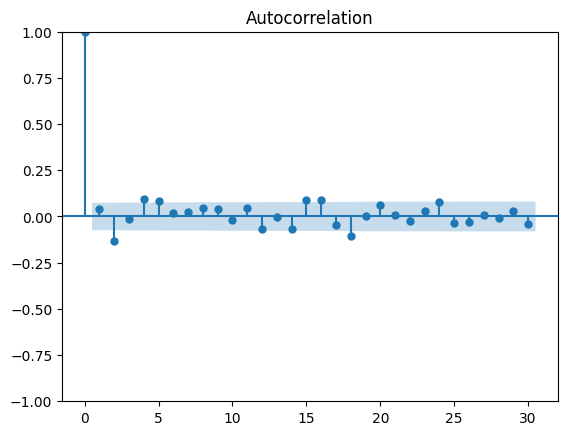

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(resid["pm10"], lags=30)
plt.show()

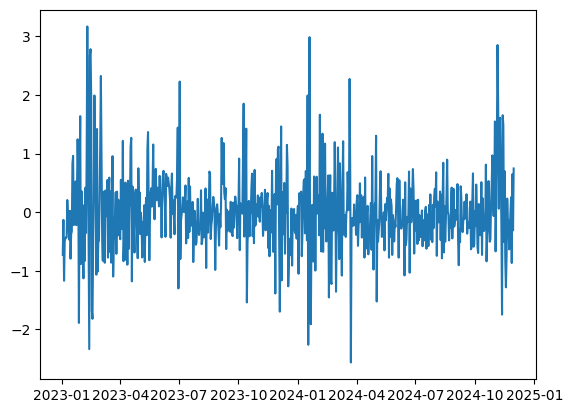

In [80]:
plt.plot(resid["pm10"])

In [81]:
resid

pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide  \
day                                                                           
2023-01-02 -0.727348 -0.357176  0.013187          0.734720        -0.065611   
2023-01-03 -0.132067 -0.290538 -0.261818         -0.310137        -0.392399   
2023-01-04 -1.171011 -0.972761  0.713676         -0.845972        -0.232018   
2023-01-05 -0.501468 -0.270231 -0.222663          0.433997        -0.043068   
2023-01-06 -0.445940 -0.388904  0.161204         -0.411895         0.012391   
...              ...       ...       ...               ...              ...   
2024-11-26  0.254403  0.238619 -0.538315          0.351464        -0.108686   
2024-11-27 -0.868716 -0.679335  0.200664         -0.203279        -0.448685   
2024-11-28  0.646277  0.788960 -0.915637          0.913041         0.638576   
2024-11-29 -0.312458 -0.316443  0.332572         -0.758355        -0.834869   
2024-11-30  0.744613  0.903760 -1.290698          0.446895         0.158292   

            temperature_2m  relative_humidity_2m  precipitation  \
day                                                               
2023-01-02       -0.535013              1.566421       1.429160   
2023-01-03       -0.323191              0.683571      -0.109245   
2023-01-04        0.587207              0.200815       0.350957   
2023-01-05        0.361650              0.205803      -0.313305   
2023-01-06       -0.106931             -0.095606      -0.472571   
...                    ...                   ...            ...   
2024-11-26       -0.595316              1.074929      -0.207992   
2024-11-27        0.154678              0.532697       0.797898   
2024-11-28       -0.562722             -0.336746      -0.561568   
2024-11-29       -0.679576              0.162205      -0.239576   
2024-11-30       -0.483403              0.649634      -0.104411   

            surface_pressure  wind_speed_10m  
day                                           
2023-01-02          0.632237       -0.586931  
2023-01-03          0.588264        0.650628  
2023-01-04         -0.213381        1.774719  
2023-01-05         -0.055014       -0.711803  
2023-01-06         -0.420976        0.793867  
...                      ...             ...  
2024-11-26          0.953051       -0.614692  
2024-11-27         -0.091555        0.788240  
2024-11-28          0.816548       -1.442549  
2024-11-29          0.327625        0.044337  
2024-11-30          0.262487       -1.264725  

[699 rows x 10 columns]

In [101]:
import importlib
from scripts import modele  # Supposez que votre module est `scripts.api`

# Rechargez le module
importlib.reload(modele)

<module 'scripts.modele' from 'c:\\Users\\steph\\Documents\\ENSAE\\Python pour la data science\\Projet_Python_2024-1\\scripts\\modele.py'>

In [ ]:
#########